## Import Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data

In [ ]:
dataset = pd.read_excel('dataset_skripsi_revisi.xlsx')
dataset.head()

No  KodeKecamatan NamaKecamatan  PEND_LGSG  ntl_median  lst_median  \
0   1        3301010   Dayeuhluhur  23.925301      2.0575       27.33   
1   2        3301020      Wanareja  16.128859      2.0600       28.63   
2   3        3301030      Majenang  19.802954      1.9725       27.05   
3   4        3301040      Cimanggu  20.609723      2.5450       28.60   
4   5        3301050  Karangpucung  25.538126      2.7500       28.79   

   bui_median  co_median  pm2.5_median  elevation_median  \
0   -1.094925   0.029577     40.400002               347   
1   -1.042542   0.030660     35.099998               113   
2   -1.039522   0.030115     35.700001               214   
3   -1.019508   0.031991     33.099998               155   
4   -1.068595   0.029256     30.299999               112   

   aridity_index_median  rwi_weighted  jlh_klg_listrik_pln  jlh_fas_pddk  \
0                2.1286     -0.066016                20142           119   
1                1.7988      0.465525                40280           191   
2                2.0375      0.485363                50842           277   
3                2.0262      0.271473                38141           180   
4                1.8815      0.074722                28380           166   

   jlh_fas_ksht  jlh_imk  jlh_sentra_industri  jlh_sarana_eko  jlh_tmpt_ibdh  \
0            40      157                    0             513            356   
1            75      357                    0             839            585   
2            82      490                    2             934            684   
3            65      675                    2             521            573   
4            44      162                    4             503            492   

   kepadatan_penduduk  
0               256.0  
1               542.0  
2               842.0  
3               632.0  
4               639.0

## Preprocessing

In [ ]:
# CEK APAKAH ADA RECORD YANG MENGANDUNG NILAI NULL
dataset.isnull().sum()

No                      0
KodeKecamatan           0
NamaKecamatan           0
PEND_LGSG               0
ntl_median              0
lst_median              0
bui_median              0
co_median               0
pm2.5_median            0
elevation_median        0
aridity_index_median    0
rwi_weighted            0
jlh_klg_listrik_pln     0
jlh_fas_pddk            0
jlh_fas_ksht            0
jlh_imk                 0
jlh_sentra_industri     0
jlh_sarana_eko          0
jlh_tmpt_ibdh           0
kepadatan_penduduk      0
dtype: int64

In [ ]:
dataset.dtypes

No                        int64
KodeKecamatan             int64
NamaKecamatan            object
PEND_LGSG               float64
ntl_median              float64
lst_median              float64
bui_median              float64
co_median               float64
pm2.5_median            float64
elevation_median          int64
aridity_index_median    float64
rwi_weighted            float64
jlh_klg_listrik_pln       int64
jlh_fas_pddk              int64
jlh_fas_ksht              int64
jlh_imk                   int64
jlh_sentra_industri       int64
jlh_sarana_eko            int64
jlh_tmpt_ibdh             int64
kepadatan_penduduk      float64
dtype: object

In [ ]:
dataset.drop(dataset.columns[[0,1,2]], axis = 1, inplace = True)

In [ ]:
dataset.head()

PEND_LGSG  ntl_median  lst_median  bui_median  co_median  pm2.5_median  \
0  23.925301      2.0575       27.33   -1.094925   0.029577     40.400002   
1  16.128859      2.0600       28.63   -1.042542   0.030660     35.099998   
2  19.802954      1.9725       27.05   -1.039522   0.030115     35.700001   
3  20.609723      2.5450       28.60   -1.019508   0.031991     33.099998   
4  25.538126      2.7500       28.79   -1.068595   0.029256     30.299999   

   elevation_median  aridity_index_median  rwi_weighted  jlh_klg_listrik_pln  \
0               347                2.1286     -0.066016                20142   
1               113                1.7988      0.465525                40280   
2               214                2.0375      0.485363                50842   
3               155                2.0262      0.271473                38141   
4               112                1.8815      0.074722                28380   

   jlh_fas_pddk  jlh_fas_ksht  jlh_imk  jlh_sentra_industri  jlh_sarana_eko  \
0           119            40      157                    0             513   
1           191            75      357                    0             839   
2           277            82      490                    2             934   
3           180            65      675                    2             521   
4           166            44      162                    4             503   

   jlh_tmpt_ibdh  kepadatan_penduduk  
0            356               256.0  
1            585               542.0  
2            684               842.0  
3            573               632.0  
4            492               639.0

In [ ]:
# Define variable x and y
data_x = dataset.loc[:, ~dataset.columns.isin(dataset.columns[[0]])]
data_y = dataset.loc[:, dataset.columns[[0]]]

In [ ]:
data_x.head()

ntl_median  lst_median  bui_median  co_median  pm2.5_median  \
0      2.0575       27.33   -1.094925   0.029577     40.400002   
1      2.0600       28.63   -1.042542   0.030660     35.099998   
2      1.9725       27.05   -1.039522   0.030115     35.700001   
3      2.5450       28.60   -1.019508   0.031991     33.099998   
4      2.7500       28.79   -1.068595   0.029256     30.299999   

   elevation_median  aridity_index_median  rwi_weighted  jlh_klg_listrik_pln  \
0               347                2.1286     -0.066016                20142   
1               113                1.7988      0.465525                40280   
2               214                2.0375      0.485363                50842   
3               155                2.0262      0.271473                38141   
4               112                1.8815      0.074722                28380   

   jlh_fas_pddk  jlh_fas_ksht  jlh_imk  jlh_sentra_industri  jlh_sarana_eko  \
0           119            40      157                    0             513   
1           191            75      357                    0             839   
2           277            82      490                    2             934   
3           180            65      675                    2             521   
4           166            44      162                    4             503   

   jlh_tmpt_ibdh  kepadatan_penduduk  
0            356               256.0  
1            585               542.0  
2            684               842.0  
3            573               632.0  
4            492               639.0

In [ ]:
# Split variabel respons
data_y1 = data_y.loc[:, dataset.columns[[0]]]
# data_y2 = data_y.loc[:, dataset.columns[[1]]]

In [ ]:
data_y1.head()

PEND_LGSG
0  23.925301
1  16.128859
2  19.802954
3  20.609723
4  25.538126

## EDA

### 1. Periksa distribusi data dari setiap variabel

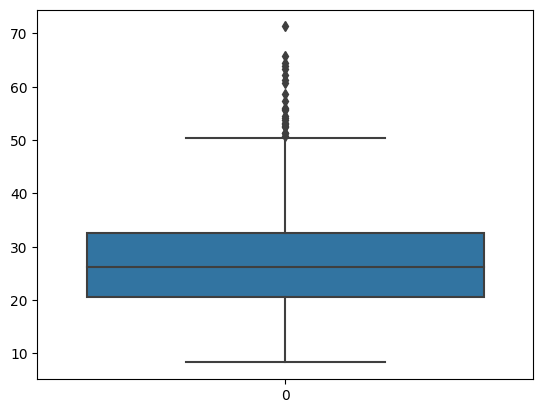

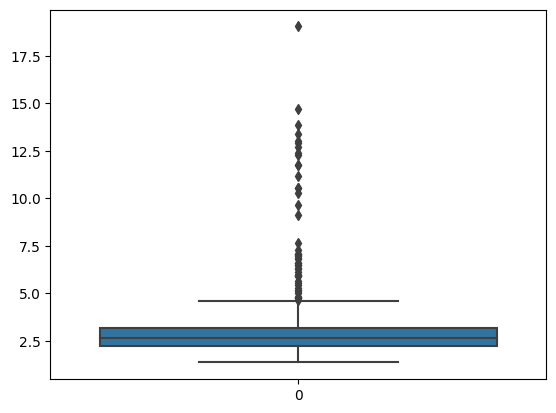

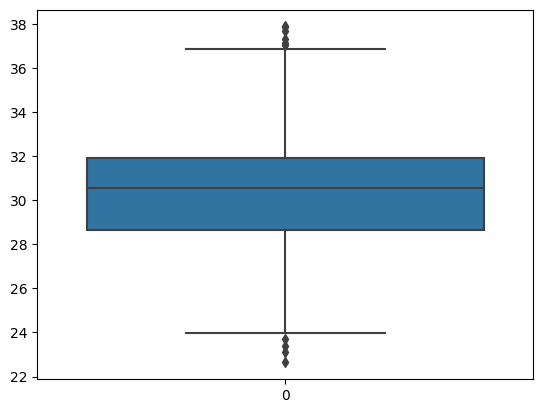

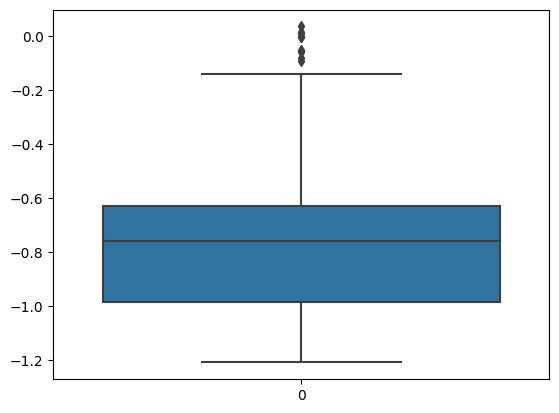

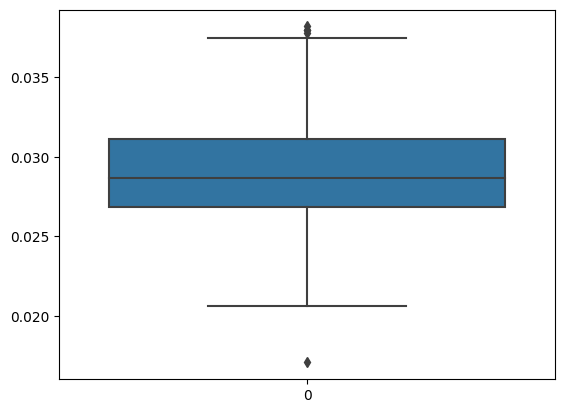

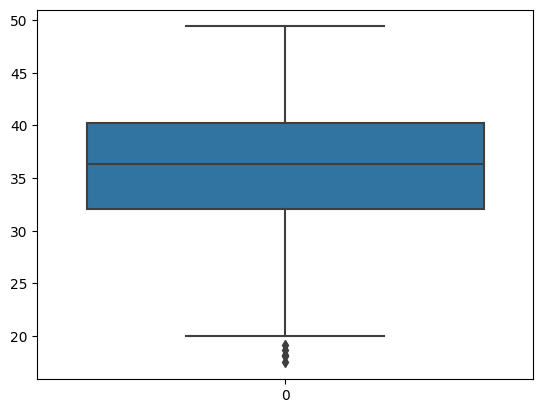

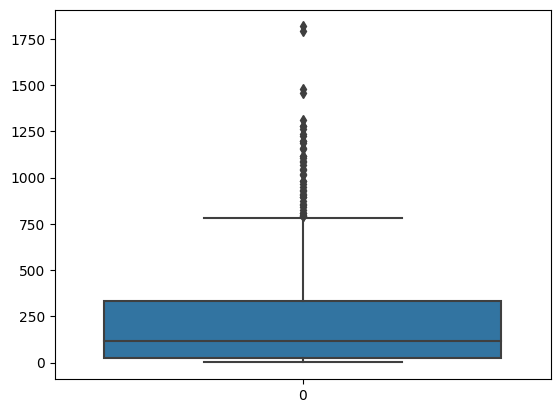

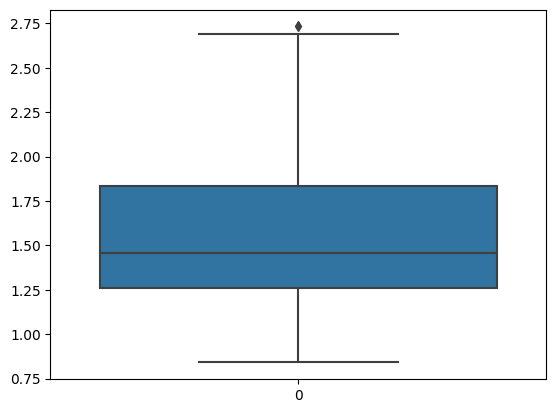

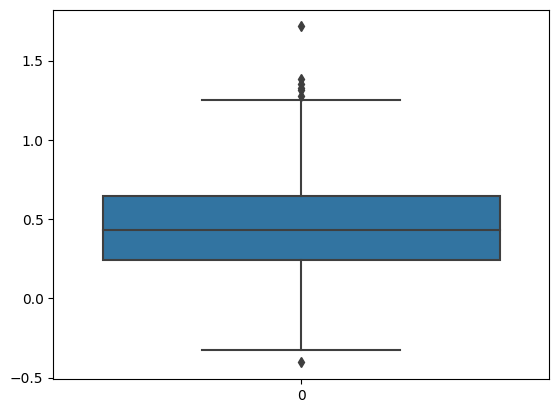

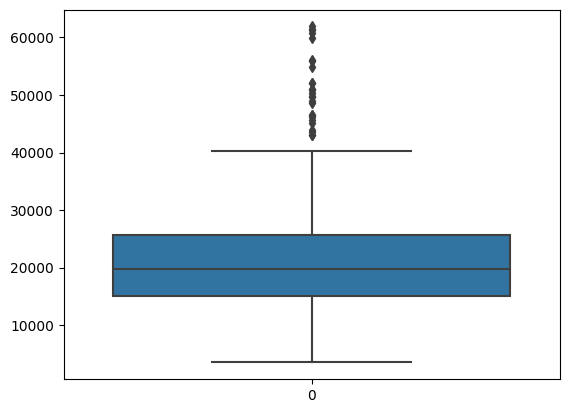

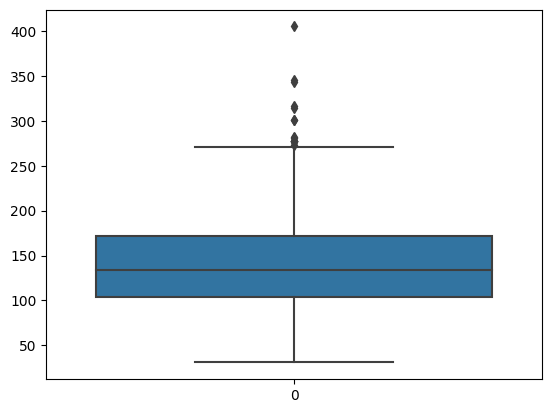

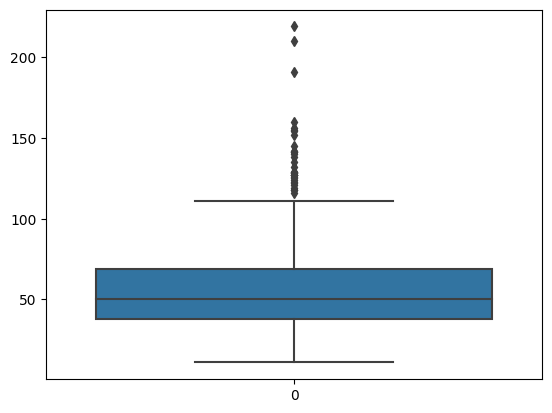

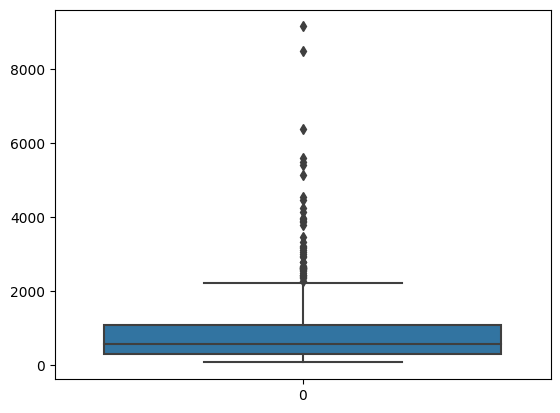

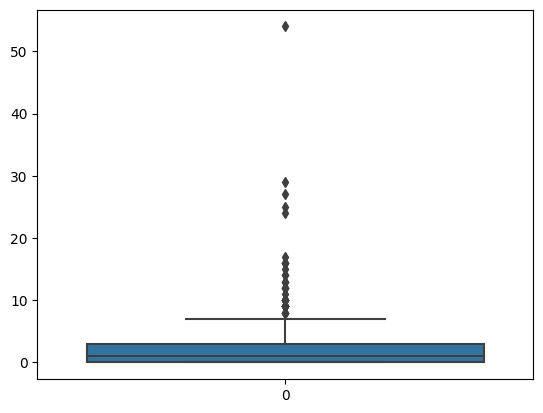

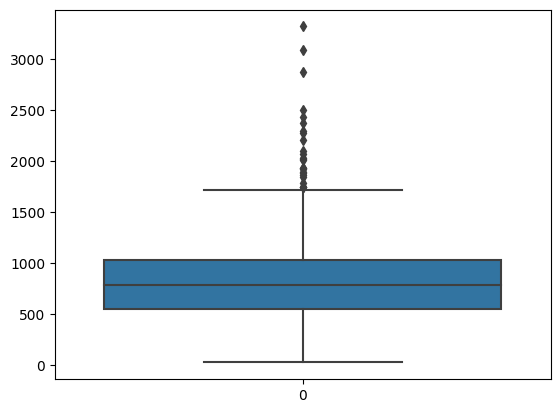

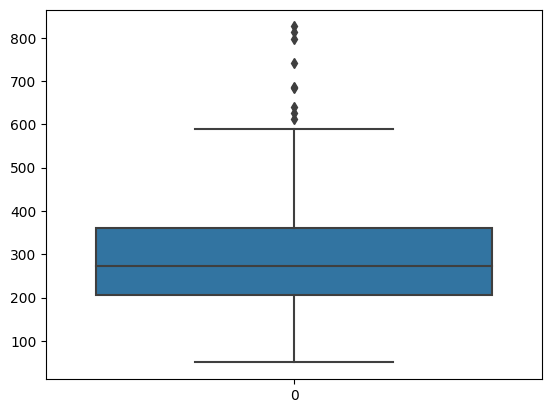

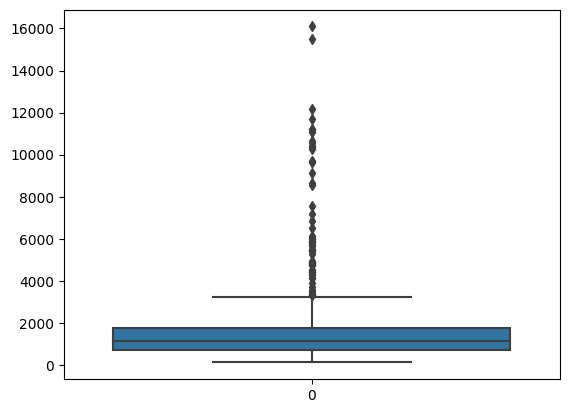

<Figure size 640x480 with 0 Axes>

In [ ]:
num_col = range(len(dataset.columns))
for i in num_col:
  sns.boxplot(dataset.iloc[:,i])
  plt.figure()

<Axes: xlabel='rwi_weighted', ylabel='Count'>

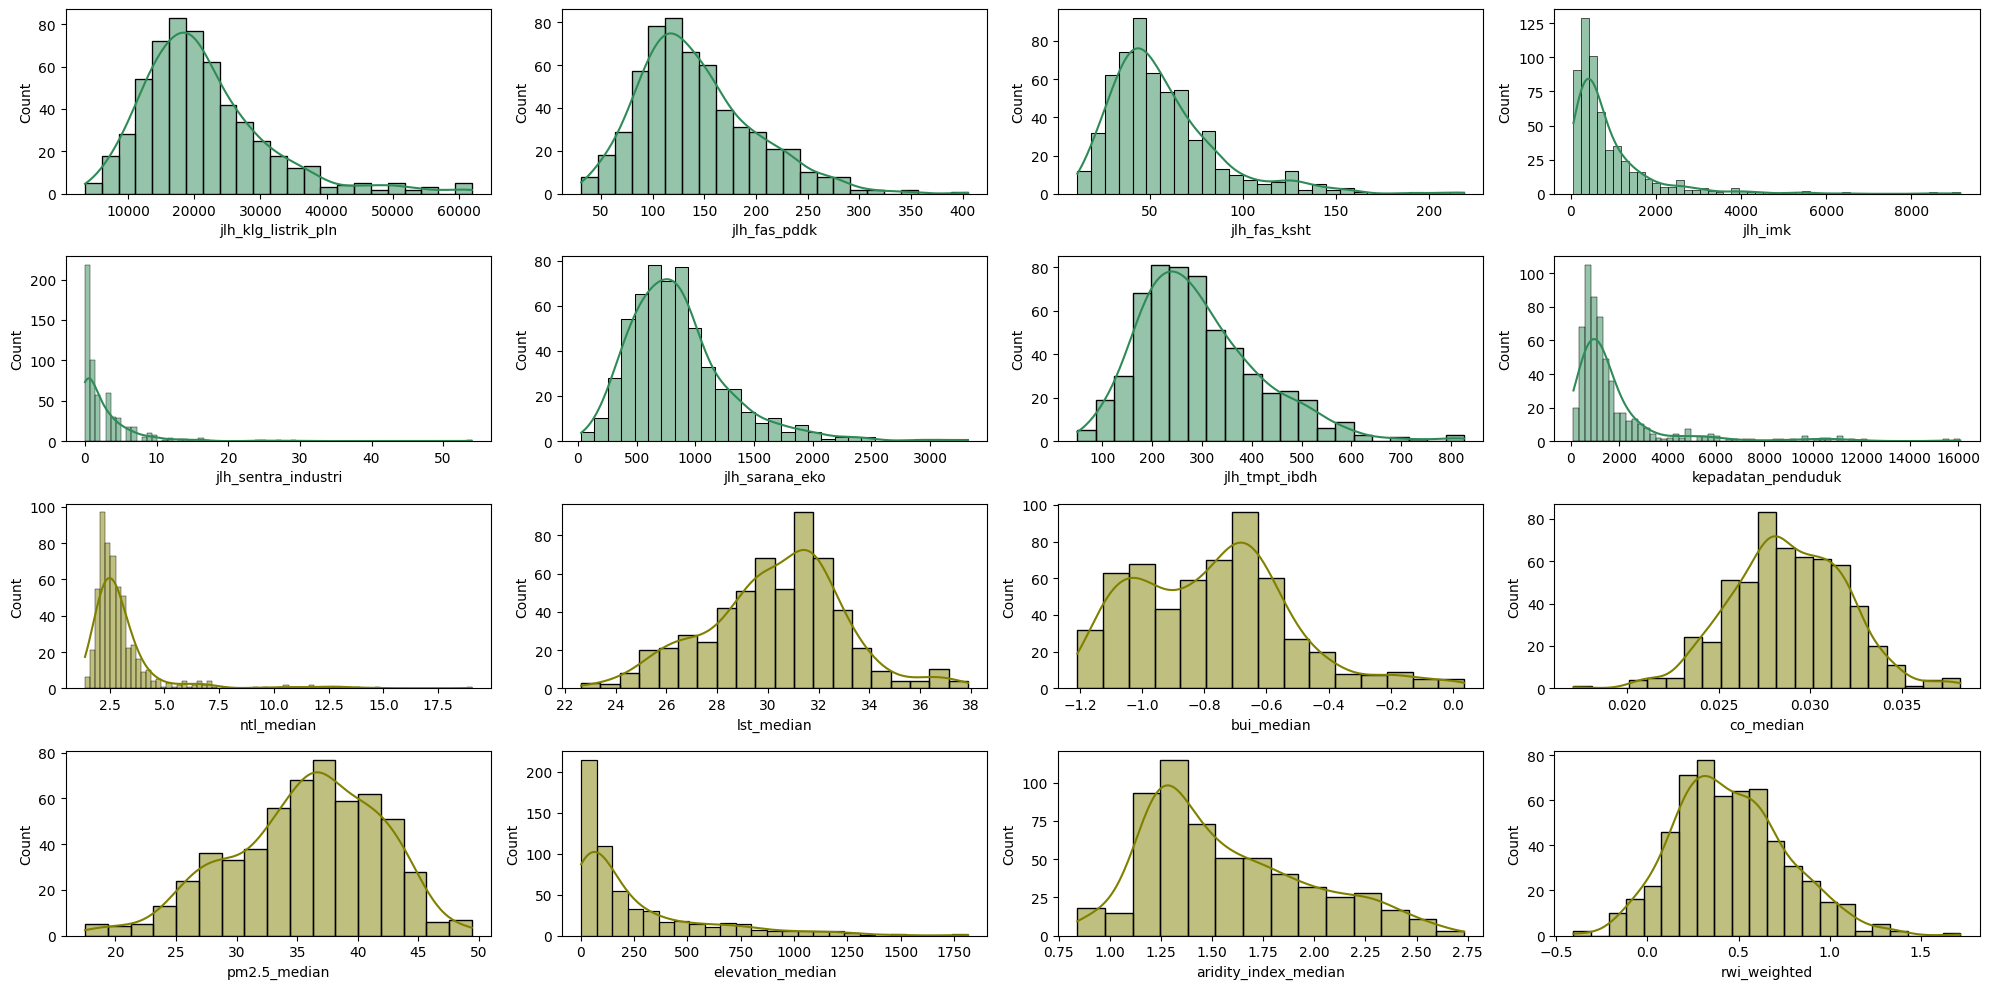

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(20, 10), tight_layout=True)

sns.histplot(data=dataset, x="jlh_klg_listrik_pln", kde=True, color="seagreen", ax=axs[0, 0])
sns.histplot(data=dataset, x="jlh_fas_pddk", kde=True, color="seagreen", ax=axs[0, 1])
sns.histplot(data=dataset, x="jlh_fas_ksht", kde=True, color="seagreen", ax=axs[0, 2])
sns.histplot(data=dataset, x="jlh_imk", kde=True, color="seagreen", ax=axs[0, 3])
sns.histplot(data=dataset, x="jlh_sentra_industri", kde=True, color="seagreen", ax=axs[1, 0])
sns.histplot(data=dataset, x="jlh_sarana_eko", kde=True, color="seagreen", ax=axs[1, 1])
sns.histplot(data=dataset, x="jlh_tmpt_ibdh", kde=True, color="seagreen", ax=axs[1, 2])
sns.histplot(data=dataset, x="kepadatan_penduduk", kde=True, color="seagreen", ax=axs[1, 3])
sns.histplot(data=dataset, x="ntl_median", kde=True, color="olive", ax=axs[2, 0])
sns.histplot(data=dataset, x="lst_median", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=dataset, x="bui_median", kde=True, color="olive", ax=axs[2, 2])
sns.histplot(data=dataset, x="co_median", kde=True, color="olive", ax=axs[2, 3])
sns.histplot(data=dataset, x="pm2.5_median", kde=True, color="olive", ax=axs[3, 0])
sns.histplot(data=dataset, x="elevation_median", kde=True, color="olive", ax=axs[3, 1])
sns.histplot(data=dataset, x="aridity_index_median", kde=True, color="olive", ax=axs[3, 2])
sns.histplot(data=dataset, x="rwi_weighted", kde=True, color="olive", ax=axs[3, 3])

<Axes: xlabel='rwi_weighted', ylabel='Count'>

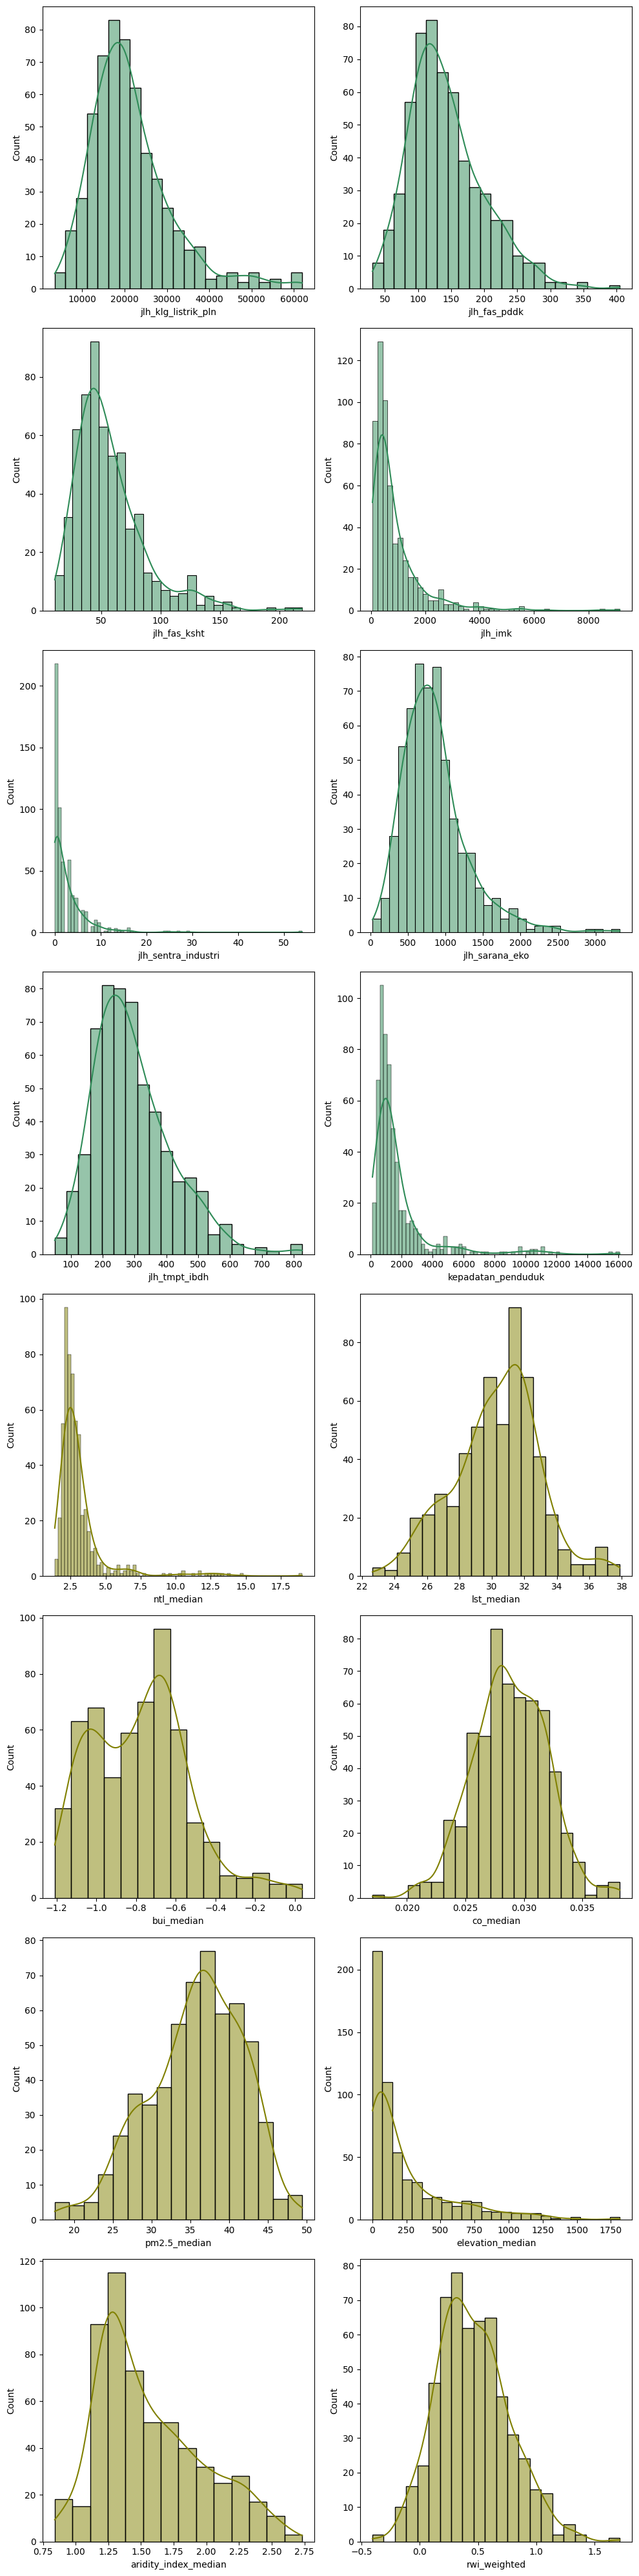

In [ ]:
fig, axs = plt.subplots(8, 2, figsize=(10, 40), tight_layout=True)

sns.histplot(data=dataset, x="jlh_klg_listrik_pln", kde=True, color="seagreen", ax=axs[0, 0])
sns.histplot(data=dataset, x="jlh_fas_pddk", kde=True, color="seagreen", ax=axs[0, 1])
sns.histplot(data=dataset, x="jlh_fas_ksht", kde=True, color="seagreen", ax=axs[1, 0])
sns.histplot(data=dataset, x="jlh_imk", kde=True, color="seagreen", ax=axs[1, 1])
sns.histplot(data=dataset, x="jlh_sentra_industri", kde=True, color="seagreen", ax=axs[2, 0])
sns.histplot(data=dataset, x="jlh_sarana_eko", kde=True, color="seagreen", ax=axs[2, 1])
sns.histplot(data=dataset, x="jlh_tmpt_ibdh", kde=True, color="seagreen", ax=axs[3, 0])
sns.histplot(data=dataset, x="kepadatan_penduduk", kde=True, color="seagreen", ax=axs[3, 1])
sns.histplot(data=dataset, x="ntl_median", kde=True, color="olive", ax=axs[4, 0])
sns.histplot(data=dataset, x="lst_median", kde=True, color="olive", ax=axs[4, 1])
sns.histplot(data=dataset, x="bui_median", kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=dataset, x="co_median", kde=True, color="olive", ax=axs[5, 1])
sns.histplot(data=dataset, x="pm2.5_median", kde=True, color="olive", ax=axs[6, 0])
sns.histplot(data=dataset, x="elevation_median", kde=True, color="olive", ax=axs[6, 1])
sns.histplot(data=dataset, x="aridity_index_median", kde=True, color="olive", ax=axs[7, 0])
sns.histplot(data=dataset, x="rwi_weighted", kde=True, color="olive", ax=axs[7, 1])

In [ ]:
dataset.columns

Index(['PEND_LGSG', 'ntl_median', 'lst_median', 'bui_median', 'co_median',
       'pm2.5_median', 'elevation_median', 'aridity_index_median',
       'rwi_weighted', 'jlh_klg_listrik_pln', 'jlh_fas_pddk', 'jlh_fas_ksht',
       'jlh_imk', 'jlh_sentra_industri', 'jlh_sarana_eko', 'jlh_tmpt_ibdh',
       'kepadatan_penduduk'],
      dtype='object')

## Pemeriksaan Nilai Korelasi dan Uji Korelasi Pearson

### 1. Nilai korelasi antara variabel konsumsi listrik per kapita (Y1) dengan semua variabel bebas (Xi)

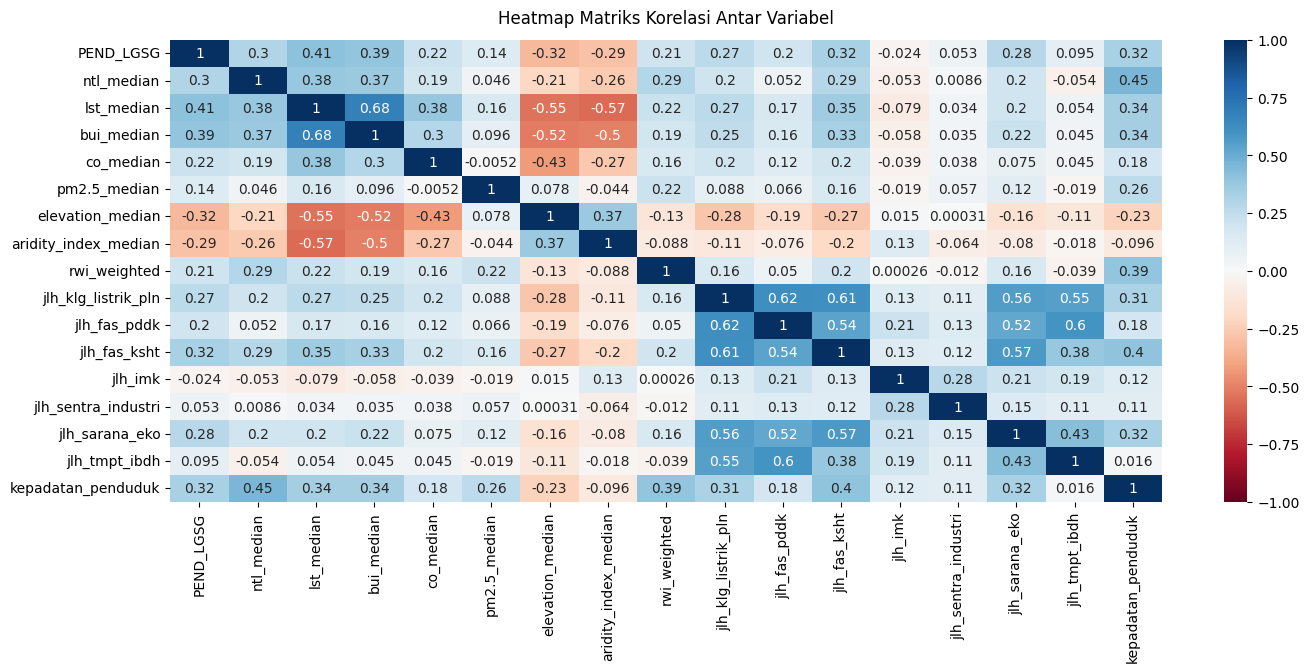

In [ ]:
# dataset_x_y1 = dataset.loc[:, ~dataset.columns.isin(dataset.columns[[0]])]

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap="RdBu")

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Heatmap Matriks Korelasi Antar Variabel', fontdict={'fontsize':12}, pad=12);

### 2. Uji Korelasi Pearson antara Variabel Konsumsi Listrik Per Kapita (Y1) dan Semua Variabel Bebas (Xi)

In [ ]:
# Import required libraries
from scipy.stats import kendalltau

# calculation correlation coefficient and p-value between x and y
from scipy.stats.stats import pearsonr
for i in range(1,len(dataset.columns)):
  result = kendalltau(dataset.iloc[:,0], dataset.iloc[:,i])
  print("Korelasi dan P-value antara variabel konsumsi listrik perkapita dan variabel", dataset.columns.values[[i]], "adalah", result)

Korelasi dan P-value antara variabel konsumsi listrik perkapita dan variabel ['ntl_median'] adalah SignificanceResult(statistic=0.2999271220607729, pvalue=7.781730125003977e-27)
Korelasi dan P-value antara variabel konsumsi listrik perkapita dan variabel ['lst_median'] adalah SignificanceResult(statistic=0.41032929621177483, pvalue=9.768455943343895e-49)
Korelasi dan P-value antara variabel konsumsi listrik perkapita dan variabel ['bui_median'] adalah SignificanceResult(statistic=0.3931392600394351, pvalue=6.617381192234979e-45)
Korelasi dan P-value antara variabel konsumsi listrik perkapita dan variabel ['co_median'] adalah SignificanceResult(statistic=0.2150247251033739, pvalue=1.4709475106499852e-14)
Korelasi dan P-value antara variabel konsumsi listrik perkapita dan variabel ['pm2.5_median'] adalah SignificanceResult(statistic=0.1357236179918263, pvalue=1.2537074853439325e-06)
Korelasi dan P-value antara variabel konsumsi listrik perkapita dan variabel ['elevation_median'] adalah S

<ipython-input-19-232690640cb6>:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


## Variabel yang terpilih setelah hasil uji korelasi:
1. NTL
2. LST
3. BUI
4. ELEVATION
5. CO
6. PM 2,5
7. ARIDITY INDEX
8. RWI
9. JUMLAH KELUARGA PELANGGAN LISTRIK PLN
10. JUMLAH FASILITAS PENDIDIKAN
11. JUMLAH FASILITAS KESEHATAN
12. JUMLAH SARANA DAN PRASARANA EKONOMI
13. JUMLAH TEMPAT IBADAH
14. KEPADATAN PENDUDUK

## Pemeriksaan Multikolinearitas

In [ ]:
data_x_selection = data_x.loc[:, ~data_x.columns.isin(data_x.columns[[11,12]])]

In [ ]:
data_x_selection.columns

Index(['ntl_median', 'lst_median', 'bui_median', 'co_median', 'pm2.5_median',
       'elevation_median', 'aridity_index_median', 'rwi_weighted',
       'jlh_klg_listrik_pln', 'jlh_fas_pddk', 'jlh_fas_ksht', 'jlh_sarana_eko',
       'jlh_tmpt_ibdh', 'kepadatan_penduduk'],
      dtype='object')

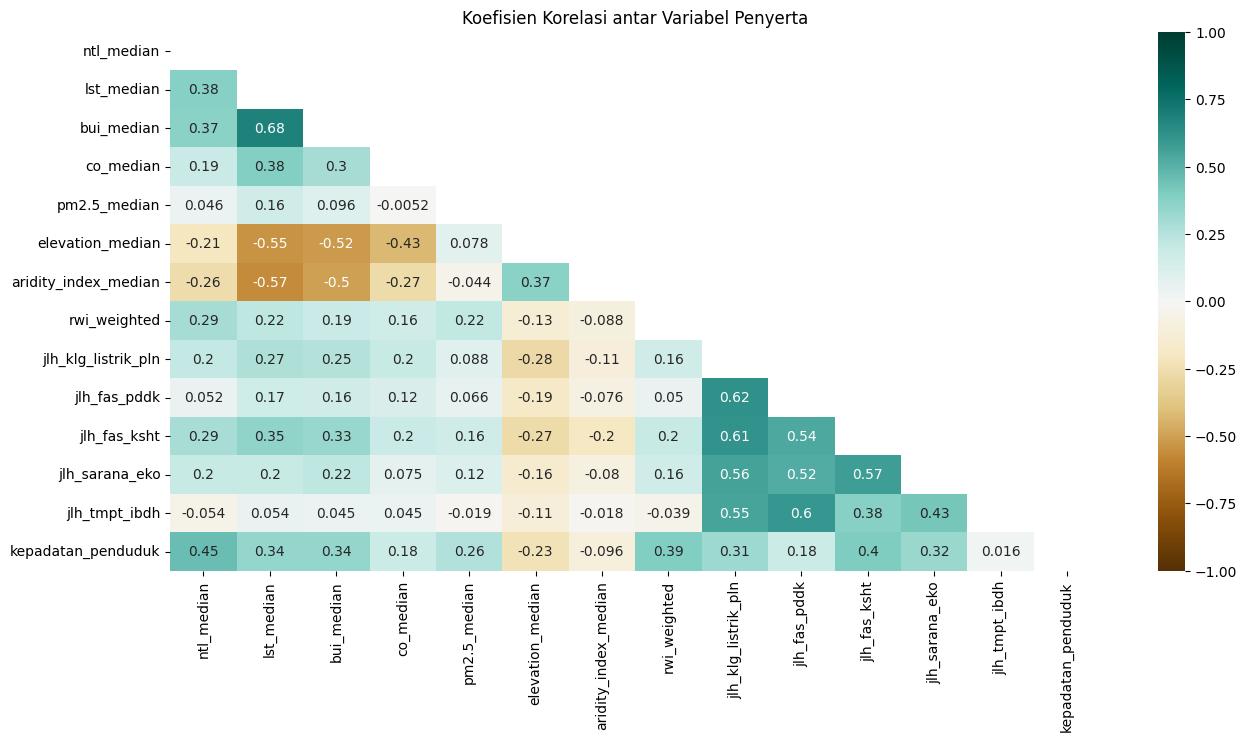

In [ ]:
plt.figure(figsize=(15,7))

# generate mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data_x_selection.corr(), dtype=bool))

# generate heatmap
sns.heatmap(data_x_selection.corr(method="kendall"), annot=True, mask=mask, vmin=-1, vmax=1, cmap='BrBG')
plt.title("Koefisien Korelasi antar Variabel Penyerta")
plt.show()

### Variance Inflation Factor (VIF)

In [ ]:
from sklearn.linear_model import LinearRegression

# Calculate VIF function
def calculate_vif(df, features):
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)

        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [ ]:
calculate_vif(df=data_x_selection, features=['ntl_median', 'lst_median', 'bui_median', 'co_median', 'pm2.5_median',
                                             'elevation_median', 'aridity_index_median', 'rwi_weighted',
                                             'jlh_klg_listrik_pln', 'jlh_fas_pddk', 'jlh_fas_ksht', 'jlh_sarana_eko',
                                             'jlh_tmpt_ibdh', 'kepadatan_penduduk'])

VIF  Tolerance
ntl_median             5.631555   0.177571
lst_median            12.699985   0.078740
bui_median             4.663919   0.214412
co_median              1.700263   0.588144
pm2.5_median           1.646249   0.607441
elevation_median       4.359110   0.229405
aridity_index_median   3.670783   0.272421
rwi_weighted           1.548146   0.645934
jlh_klg_listrik_pln    5.816031   0.171939
jlh_fas_pddk           4.880905   0.204880
jlh_fas_ksht           5.096888   0.196198
jlh_sarana_eko         2.881605   0.347029
jlh_tmpt_ibdh          4.323902   0.231273
kepadatan_penduduk     6.467060   0.154630

## Variabel yang terpilih setelah hasil pemeriksaan multikolinearitas:
1. NTL
2. BUI
3. ELEVATION
4. CO
5. PM 2,5
6. ARIDITY INDEX
7. RWI
8. JUMLAH KELUARGA PELANGGAN LISTRIK PLN
9. JUMLAH FASILITAS PENDIDIKAN
10. JUMLAH FASILITAS KESEHATAN
11. JUMLAH SARANA DAN PRASARANA EKONOMI
12. JUMLAH TEMPAT IBADAH
13. KEPADATAN PENDUDUK

## Backward Elimination

In [ ]:
import statsmodels.api as sm
X_opt = dataset.loc[:, dataset.columns[[1,3,4,5,6,7,8,9,10,11,14,15,16]]]
pend_lgsg = dataset.loc[:, dataset.columns[[0]]]
regressor_OLS = sm.OLS(endog = pend_lgsg, exog = sm.add_constant(X_opt)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PEND_LGSG   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     30.72
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           3.47e-57
Time:                        04:07:28   Log-Likelihood:                -2011.3
No. Observations:                 572   AIC:                             4051.
Df Residuals:                     558   BIC:                             4112.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   25.8833      5.710      4.533      0.000      14.667      37.100
ntl_median               0.1286      0.418      0.308      0.758      -0.692       0.949
bui_median               8.7548      2.564      3.415      0.001       3.719      13.791
co_median               42.4259    142.820      0.297      0.767    -238.104     322.955
pm2.5_median             0.1296      0.068      1.895      0.059      -0.005       0.264
elevation_median        -0.0061      0.002     -3.328      0.001      -0.010      -0.002
aridity_index_median    -1.4941      1.467     -1.019      0.309      -4.375       1.387
rwi_weighted             2.7540      1.391      1.980      0.048       0.022       5.486
jlh_klg_listrik_pln   7.842e-05   8.55e-05      0.918      0.359   -8.94e-05       0.000
jlh_fas_pddk             0.0171      0.014      1.262      0.208      -0.010       0.044
jlh_fas_ksht            -0.0086      0.026     -0.326      0.745      -0.060       0.043
jlh_sarana_eko           0.0051      0.001      3.824      0.000       0.002       0.008
jlh_tmpt_ibdh           -0.0130      0.006     -2.223      0.027      -0.025      -0.002
kepadatan_penduduk       0.0004      0.000      0.906      0.365      -0.000       0.001
==============================================================================
Omnibus:                      102.929   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.966
Skew:                           0.967   Prob(JB):                     8.55e-50
Kurtosis:                       5.396   Cond. No.                     9.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Second Step (remove variable CO)
X_opt = dataset.loc[:, dataset.columns[[1,3,5,6,7,8,9,10,11,14,15,16]]]
regressor_OLS = sm.OLS(endog = pend_lgsg, exog = sm.add_constant(X_opt)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PEND_LGSG   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     33.32
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           6.13e-58
Time:                        04:07:28   Log-Likelihood:                -2011.4
No. Observations:                 572   AIC:                             4049.
Df Residuals:                     559   BIC:                             4105.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   27.2166      3.527      7.716      0.000      20.288      34.145
ntl_median               0.1246      0.417      0.299      0.765      -0.695       0.944
bui_median               8.7873      2.559      3.433      0.001       3.760      13.815
pm2.5_median             0.1297      0.068      1.897      0.058      -0.005       0.264
elevation_median        -0.0062      0.002     -3.664      0.000      -0.010      -0.003
aridity_index_median    -1.5166      1.464     -1.036      0.301      -4.392       1.358
rwi_weighted             2.7826      1.387      2.007      0.045       0.059       5.506
jlh_klg_listrik_pln   8.373e-05   8.35e-05      1.003      0.316   -8.03e-05       0.000
jlh_fas_pddk             0.0173      0.014      1.278      0.202      -0.009       0.044
jlh_fas_ksht            -0.0085      0.026     -0.325      0.745      -0.060       0.043
jlh_sarana_eko           0.0051      0.001      3.821      0.000       0.002       0.008
jlh_tmpt_ibdh           -0.0134      0.006     -2.325      0.020      -0.025      -0.002
kepadatan_penduduk       0.0004      0.000      0.900      0.368      -0.000       0.001
==============================================================================
Omnibus:                      103.520   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.702
Skew:                           0.972   Prob(JB):                     3.59e-50
Kurtosis:                       5.404   Cond. No.                     2.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Third Step (remove variable NTL)
X_opt = dataset.loc[:, dataset.columns[[3,5,6,7,8,9,10,11,14,15,16]]]
regressor_OLS = sm.OLS(endog = pend_lgsg, exog = sm.add_constant(X_opt)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PEND_LGSG   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     36.40
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.03e-58
Time:                        04:07:28   Log-Likelihood:                -2011.4
No. Observations:                 572   AIC:                             4047.
Df Residuals:                     560   BIC:                             4099.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   27.7029      3.126      8.862      0.000      21.563      33.843
bui_median               8.8738      2.541      3.492      0.001       3.883      13.865
pm2.5_median             0.1267      0.068      1.875      0.061      -0.006       0.259
elevation_median        -0.0062      0.002     -3.667      0.000      -0.009      -0.003
aridity_index_median    -1.5882      1.443     -1.101      0.271      -4.422       1.246
rwi_weighted             2.8106      1.382      2.033      0.042       0.096       5.526
jlh_klg_listrik_pln    8.47e-05   8.34e-05      1.016      0.310   -7.91e-05       0.000
jlh_fas_pddk             0.0167      0.013      1.248      0.213      -0.010       0.043
jlh_fas_ksht            -0.0076      0.026     -0.293      0.770      -0.059       0.044
jlh_sarana_eko           0.0051      0.001      3.822      0.000       0.002       0.008
jlh_tmpt_ibdh           -0.0133      0.006     -2.321      0.021      -0.025      -0.002
kepadatan_penduduk       0.0005      0.000      1.693      0.091    -7.6e-05       0.001
==============================================================================
Omnibus:                      103.961   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.144
Skew:                           0.980   Prob(JB):                     7.82e-50
Kurtosis:                       5.377   Cond. No.                     2.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Fourth Step (remove variable jlh_fas_ksht)
X_opt = dataset.loc[:, dataset.columns[[3,5,6,7,8,9,10,14,15,16]]]
regressor_OLS = sm.OLS(endog = pend_lgsg, exog = sm.add_constant(X_opt)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PEND_LGSG   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     40.10
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.66e-59
Time:                        04:07:29   Log-Likelihood:                -2011.5
No. Observations:                 572   AIC:                             4045.
Df Residuals:                     561   BIC:                             4093.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   27.6617      3.120      8.865      0.000      21.533      33.791
bui_median               8.8482      2.537      3.487      0.001       3.864      13.832
pm2.5_median             0.1243      0.067      1.855      0.064      -0.007       0.256
elevation_median        -0.0062      0.002     -3.671      0.000      -0.009      -0.003
aridity_index_median    -1.5302      1.428     -1.072      0.284      -4.335       1.274
rwi_weighted             2.8201      1.381      2.042      0.042       0.108       5.532
jlh_klg_listrik_pln   7.457e-05   7.58e-05      0.984      0.326   -7.43e-05       0.000
jlh_fas_pddk             0.0155      0.013      1.218      0.224      -0.009       0.040
jlh_sarana_eko           0.0049      0.001      4.075      0.000       0.003       0.007
jlh_tmpt_ibdh           -0.0129      0.006     -2.321      0.021      -0.024      -0.002
kepadatan_penduduk       0.0005      0.000      1.675      0.095   -8.08e-05       0.001
==============================================================================
Omnibus:                      104.785   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.548
Skew:                           0.984   Prob(JB):                     1.43e-50
Kurtosis:                       5.399   Cond. No.                     2.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Fifth Step (remove variable jlh_klg_listrik_pln)
X_opt = dataset.loc[:, dataset.columns[[3,5,6,7,8,10,14,15,16]]]
regressor_OLS = sm.OLS(endog = pend_lgsg, exog = sm.add_constant(X_opt)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PEND_LGSG   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     44.45
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           3.87e-60
Time:                        04:07:29   Log-Likelihood:                -2012.0
No. Observations:                 572   AIC:                             4044.
Df Residuals:                     562   BIC:                             4087.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   27.4620      3.114      8.820      0.000      21.346      33.578
bui_median               9.1512      2.519      3.634      0.000       4.204      14.098
pm2.5_median             0.1283      0.067      1.918      0.056      -0.003       0.260
elevation_median        -0.0064      0.002     -3.896      0.000      -0.010      -0.003
aridity_index_median    -1.3526      1.416     -0.955      0.340      -4.135       1.430
rwi_weighted             3.1014      1.351      2.296      0.022       0.448       5.755
jlh_fas_pddk             0.0197      0.012      1.653      0.099      -0.004       0.043
jlh_sarana_eko           0.0052      0.001      4.445      0.000       0.003       0.007
jlh_tmpt_ibdh           -0.0107      0.005     -2.103      0.036      -0.021      -0.001
kepadatan_penduduk       0.0005      0.000      1.808      0.071   -4.33e-05       0.001
==============================================================================
Omnibus:                      105.561   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.517
Skew:                           0.987   Prob(JB):                     1.96e-51
Kurtosis:                       5.429   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Sixth Step (remove variable aridity_index)
X_opt = dataset.loc[:, dataset.columns[[3,5,6,8,10,14,15,16]]]
regressor_OLS = sm.OLS(endog = pend_lgsg, exog = sm.add_constant(X_opt)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PEND_LGSG   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     49.90
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           8.29e-61
Time:                        04:07:29   Log-Likelihood:                -2012.4
No. Observations:                 572   AIC:                             4043.
Df Residuals:                     563   BIC:                             4082.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 26.5087      2.949      8.989      0.000      20.716      32.301
bui_median            10.4533      2.117      4.937      0.000       6.295      14.612
pm2.5_median           0.1383      0.066      2.094      0.037       0.009       0.268
elevation_median      -0.0072      0.001     -5.055      0.000      -0.010      -0.004
rwi_weighted           3.1064      1.351      2.300      0.022       0.453       5.759
jlh_fas_pddk           0.0202      0.012      1.695      0.091      -0.003       0.044
jlh_sarana_eko         0.0052      0.001      4.457      0.000       0.003       0.007
jlh_tmpt_ibdh         -0.0115      0.005     -2.283      0.023      -0.021      -0.002
kepadatan_penduduk     0.0004      0.000      1.561      0.119      -0.000       0.001
==============================================================================
Omnibus:                      103.161   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.068
Skew:                           0.973   Prob(JB):                     2.21e-49
Kurtosis:                       5.369   Cond. No.                     2.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Variabel yang terpilih setelah dilakukan backward elimination:
1. BUI
2. PM 2.5
3. Elevation
4. RWI weighted
5. Jumlah fasilitas pendidikan
6. Jumlah sarana dan prasarana ekonomi
7. Jumlah tempat ibadah
8. Kepadatan penduduk

### MATRIKS KORELASI VARIABEL PENYERTA SETELAH DILAKUKAN BACKWARD ELIMINATION

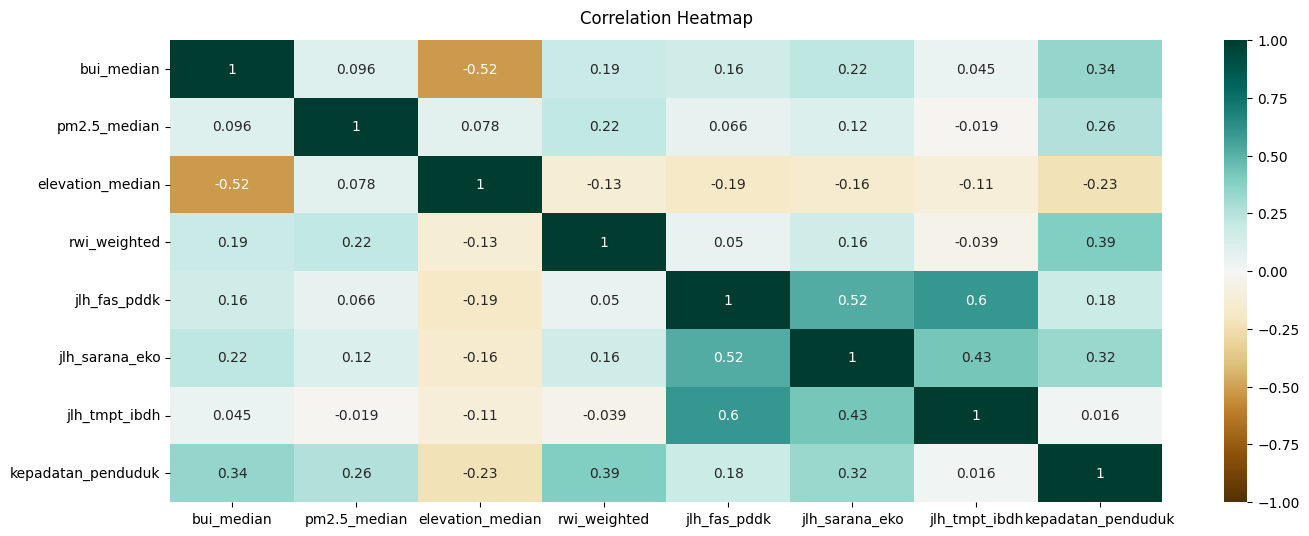

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.loc[:, dataset.columns[[3,5,6,8,10,14,15,16]]].corr(method="kendall"), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

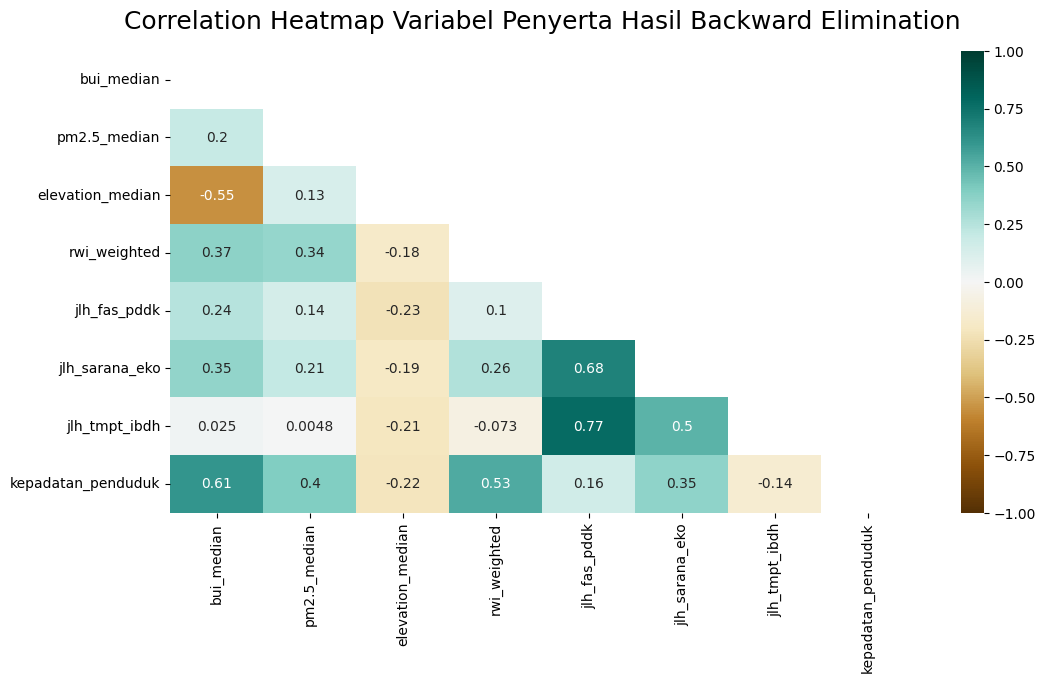

In [ ]:
import numpy as np
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataset.loc[:, dataset.columns[[3,5,6,8,10,14,15,16]]].corr(method="kendall")))
heatmap = sns.heatmap(dataset.loc[:, dataset.columns[[3,5,6,8,10,14,15,16]]].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap Variabel Penyerta Hasil Backward Elimination', fontdict={'fontsize':18}, pad=16);

In [ ]:
calculate_vif(df=data_x_selection, features=['bui_median', 'elevation_median', 'pm2.5_median',
                                             'rwi_weighted', 'jlh_fas_pddk', 'jlh_sarana_eko',
                                             'jlh_tmpt_ibdh', 'kepadatan_penduduk'])

VIF  Tolerance
bui_median          2.346070   0.426245
elevation_median    1.720775   0.581134
pm2.5_median        1.345816   0.743044
rwi_weighted        1.466559   0.681868
jlh_fas_pddk        3.776622   0.264787
jlh_sarana_eko      2.195247   0.455530
jlh_tmpt_ibdh       3.210431   0.311485
kepadatan_penduduk  2.352998   0.424990

## PENGUJIAN KEBERARTIAN MODEL DENGAN UJI PARSIAL T

In [ ]:
X_opt = dataset.loc[:, dataset.columns[[3,5,6,8,10,14,15,16]]]
regressor_OLS = sm.OLS(endog = pend_lgsg, exog = sm.add_constant(X_opt)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PEND_LGSG   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     49.90
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           8.29e-61
Time:                        04:08:25   Log-Likelihood:                -2012.4
No. Observations:                 572   AIC:                             4043.
Df Residuals:                     563   BIC:                             4082.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 26.5087      2.949      8.989      0.000      20.716      32.301
bui_median            10.4533      2.117      4.937      0.000       6.295      14.612
pm2.5_median           0.1383      0.066      2.094      0.037       0.009       0.268
elevation_median      -0.0072      0.001     -5.055      0.000      -0.010      -0.004
rwi_weighted           3.1064      1.351      2.300      0.022       0.453       5.759
jlh_fas_pddk           0.0202      0.012      1.695      0.091      -0.003       0.044
jlh_sarana_eko         0.0052      0.001      4.457      0.000       0.003       0.007
jlh_tmpt_ibdh         -0.0115      0.005     -2.283      0.023      -0.021      -0.002
kepadatan_penduduk     0.0004      0.000      1.561      0.119      -0.000       0.001
==============================================================================
Omnibus:                      103.161   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.068
Skew:                           0.973   Prob(JB):                     2.21e-49
Kurtosis:                       5.369   Cond. No.                     2.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### MATRIKS KORELASI VARIABEL PENYERTA SETELAH DILAKUKAN ELIMINASI VARIABEL DENGAN UJI PARSIAL T UNTUK MENGHAPUS VARIABEL YANG TIDAK SIGNIFIKAN
TERSISA 6 VARIABEL YANG TERPILIH YAITU:
1. BUI
2. ELEVATION
3. RWI WEIGHTED
4. PM 2.5
5. JUMLAH SARANA EKONOMI
6. JUMLAH TEMPAT IBADAH


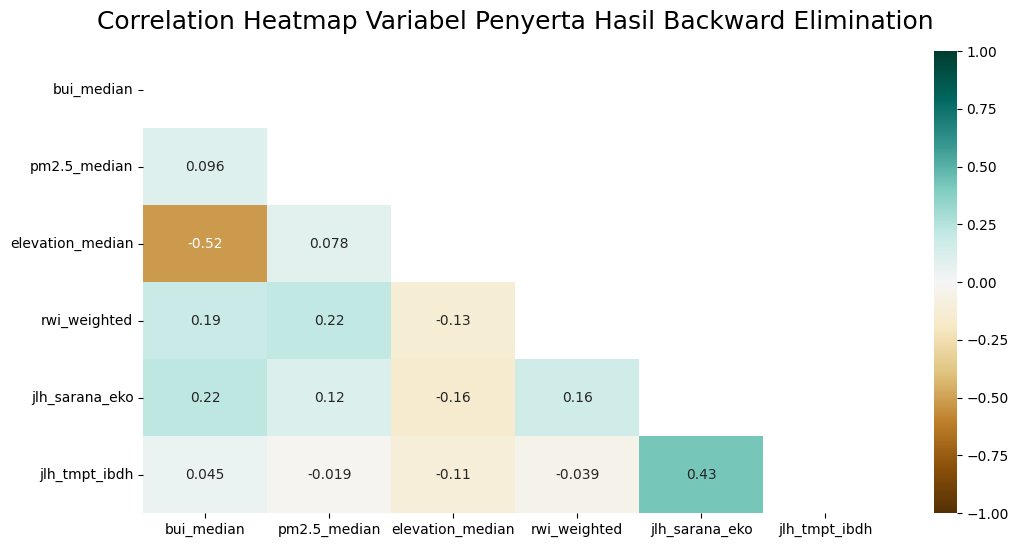

In [ ]:
import numpy as np
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataset.loc[:, dataset.columns[[3,5,6,8,14,15]]].corr(method="kendall")))
heatmap = sns.heatmap(dataset.loc[:, dataset.columns[[3,5,6,8,14,15]]].corr(method="kendall"), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap Variabel Penyerta Hasil Backward Elimination', fontdict={'fontsize':18}, pad=16);

In [ ]:
calculate_vif(df=data_x_selection, features=['bui_median', 'elevation_median', 'pm2.5_median',
                                             'rwi_weighted', 'jlh_sarana_eko',
                                             'jlh_tmpt_ibdh'])

VIF  Tolerance
bui_median        1.905821   0.524708
elevation_median  1.717379   0.582283
pm2.5_median      1.269106   0.787957
rwi_weighted      1.337181   0.747842
jlh_sarana_eko    1.700866   0.587936
jlh_tmpt_ibdh     1.550139   0.645103

## Analisis Deskriptif

In [ ]:
dataset.describe()

PEND_LGSG  ntl_median  lst_median  bui_median   co_median  \
count  572.000000  572.000000  572.000000  572.000000  572.000000   
mean    27.603810    3.127891   30.304121   -0.775237    0.028816   
std     10.677465    1.924013    2.654018    0.249013    0.003118   
min      8.309197    1.372500   22.640000   -1.208791    0.017057   
25%     20.530603    2.216250   28.635000   -0.986578    0.026821   
50%     26.146256    2.638750   30.565833   -0.758721    0.028662   
75%     32.613699    3.182188   31.931250   -0.628834    0.031111   
max     71.307973   19.035000   37.880000    0.035956    0.038206   

       pm2.5_median  elevation_median  aridity_index_median  rwi_weighted  \
count    572.000000        572.000000            572.000000    572.000000   
mean      35.748601        246.527972              1.568944      0.456085   
std        6.047223        315.182399              0.403037      0.308631   
min       17.500000          1.000000              0.840400     -0.404732   
25%       32.099998         25.000000              1.258612      0.240975   
50%       36.325000        114.500000              1.455550      0.429883   
75%       40.200001        331.000000              1.833075      0.645335   
max       49.400002       1816.000000              2.732500      1.715728   

       jlh_klg_listrik_pln  jlh_fas_pddk  jlh_fas_ksht      jlh_imk  \
count           572.000000    572.000000    572.000000   572.000000   
mean          21473.987762    142.592657     56.858392   883.821678   
std            9729.439768     56.164228     29.499429  1009.351910   
min            3516.000000     31.000000     11.000000    60.000000   
25%           15056.250000    104.000000     38.000000   301.750000   
50%           19732.000000    133.500000     50.000000   558.500000   
75%           25678.500000    171.500000     69.000000  1081.500000   
max           61913.000000    405.000000    219.000000  9152.000000   

       jlh_sentra_industri  jlh_sarana_eko  jlh_tmpt_ibdh  kepadatan_penduduk  
count           572.000000      572.000000     572.000000          572.000000  
mean              2.569930      854.034965     294.606643         1747.448497  
std               4.287031      437.237205     122.273791         2063.242523  
min               0.000000       28.000000      50.000000          117.000000  
25%               0.000000      556.250000     206.000000          721.757500  
50%               1.000000      789.500000     273.500000         1121.470000  
75%               3.000000     1030.000000     360.500000         1736.750000  
max              54.000000     3322.000000     826.000000        16094.020000

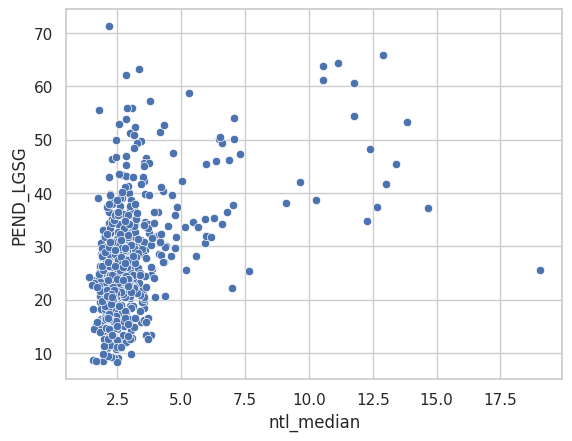

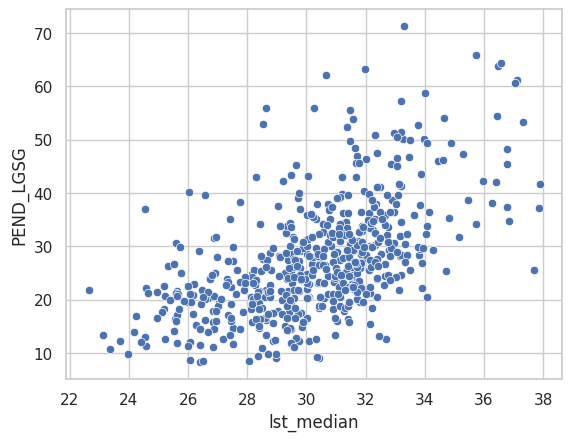

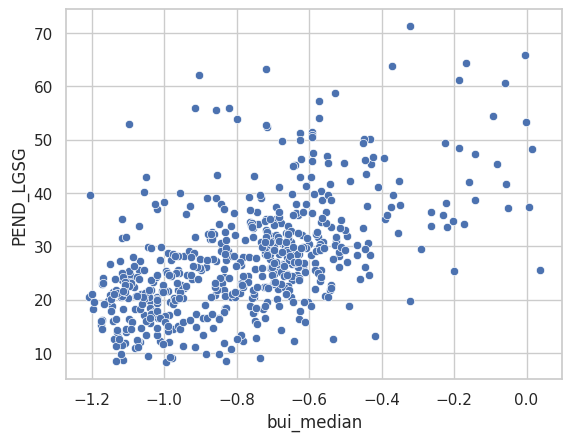

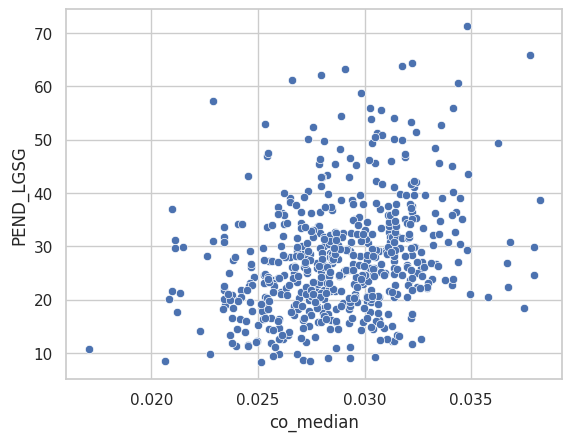

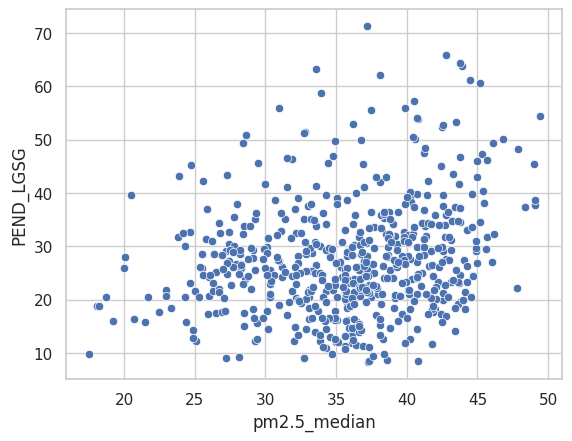

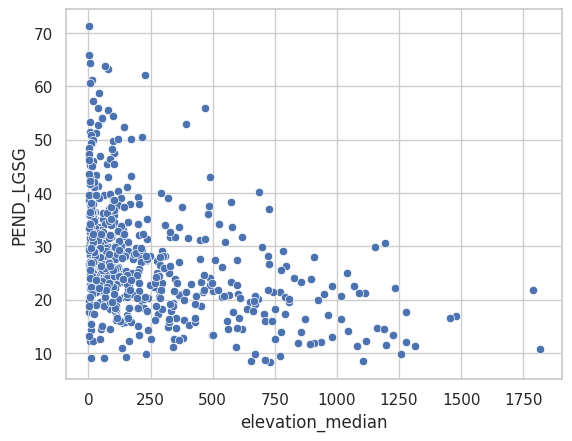

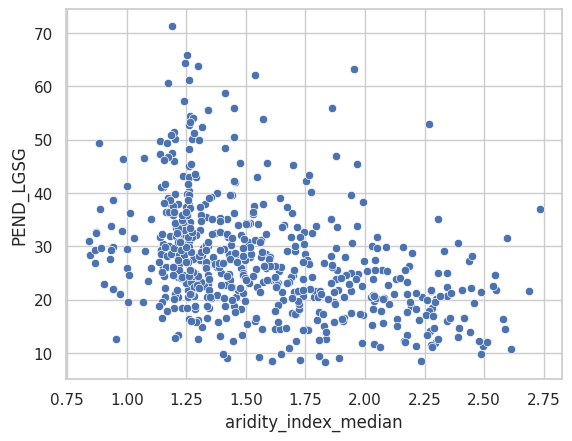

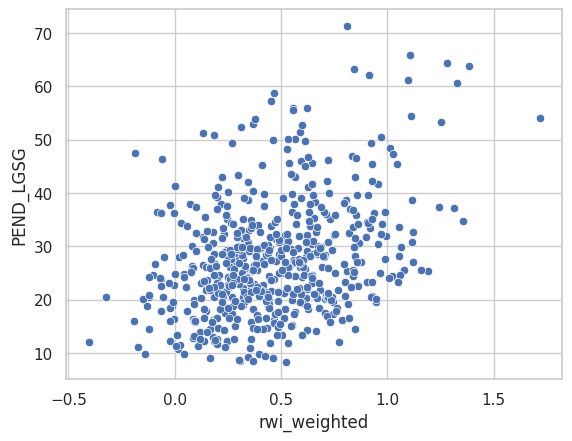

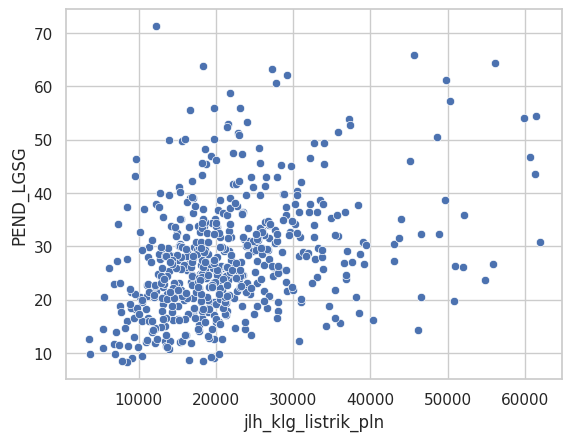

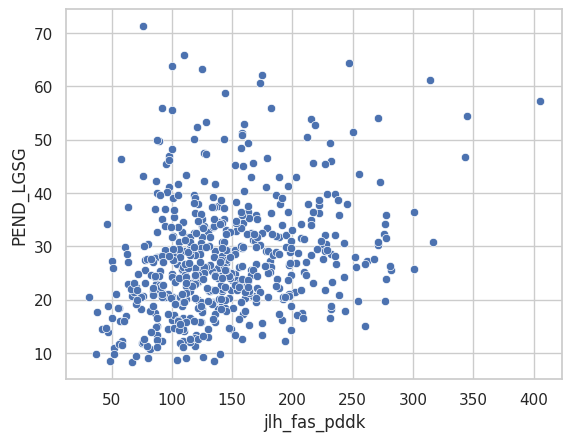

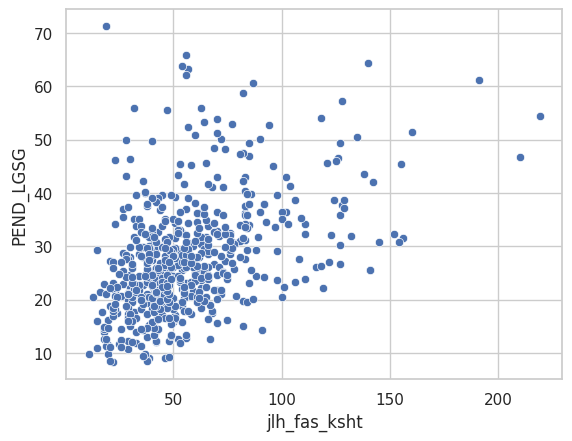

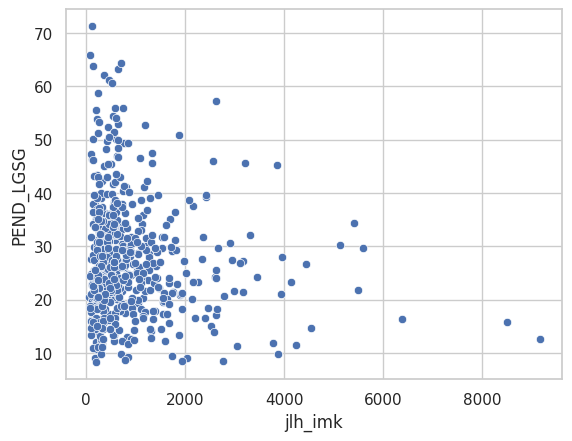

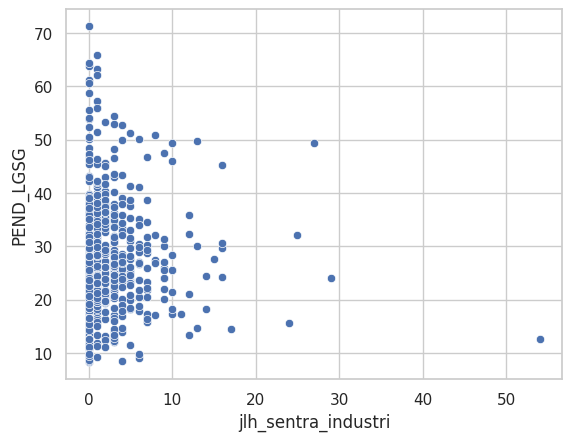

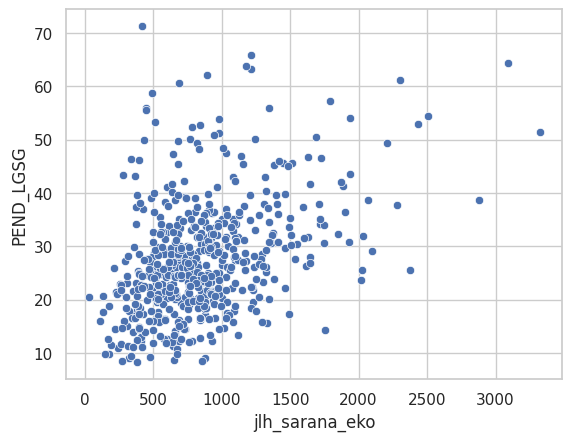

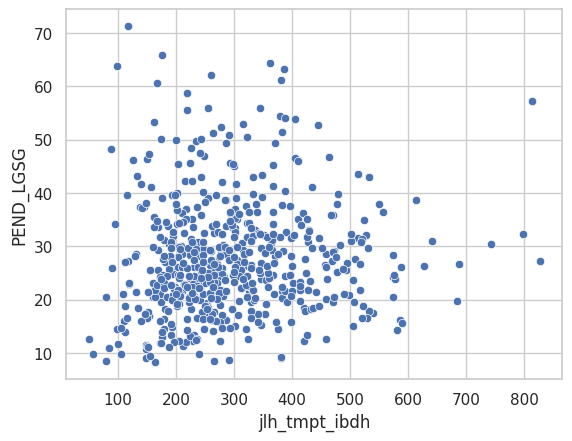

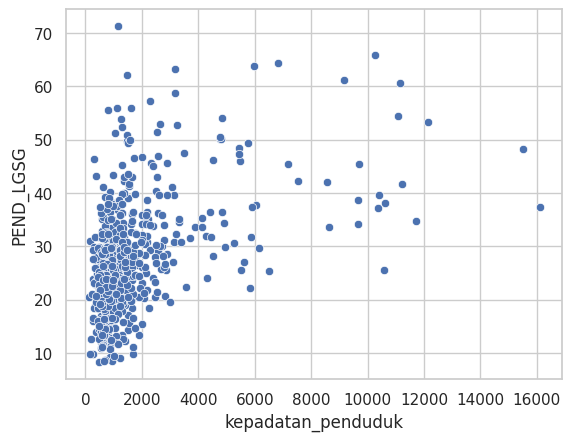

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set(style='whitegrid')
fmri = sns.load_dataset("fmri")
num_col = range(len(data_x.columns))

for i in num_col:
  sns.scatterplot(x=data_x.iloc[:,i], y=dataset.iloc[:,0])
  plt.figure()

## Uji Normalitas

<ipython-input-43-c0e5a9f49c25>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data_y.iloc[:,i], color='red',


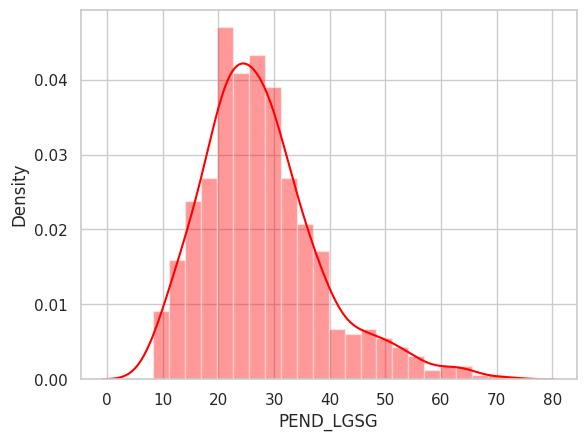

In [ ]:
# plotting histogram and density plot
for i in range(0, len(data_y.columns)) :
  sns.distplot(a=data_y.iloc[:,i], color='red',
             hist_kws={"edgecolor": 'white'})
  # visualizing plot using matplotlib.pyplot library
  plt.show()

In [ ]:
# Uji jarque bera variabel Y
import numpy as np
# from scipy import stats
from scipy.stats import norm, kstest


for i in range(0, len(data_y.columns)) :
  loc, scale = norm.fit(data_y.iloc[:,i])
  # create a normal distribution with loc and scale
  n = norm(loc=loc, scale=scale)
  result = kstest(data_y.iloc[:,i], n.cdf)
  print("Nilai statistik dan p-value dari uji jarque bera untuk variabel", data_y.columns.values[[i]], "adalah", result.statistic, "dan", result.pvalue)

Nilai statistik dan p-value dari uji jarque bera untuk variabel ['PEND_LGSG'] adalah 0.078250697345426 dan 0.0017107025991194471


## Exploratory Spatial Data Analysis (ESDA)

In [ ]:
pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.7 MB/s eta 0:00:00
  Created wheel for esda: filename=esda-2.4.3-py3-none-any.whl size=122765 sha256=b8afe439fc4539ce269bc27568db2ef634650f49b06574503a9ac97ebd56140d
  Stored in directory: /root/.cache/pip/wheels/ed/88/61/8705bb427b9aeb4ded8f07eb8ea3e8cada26881368c75619cb
Successfully built esda


In [ ]:
pip install geopandas

In [ ]:
pip install point

  Preparing metadata (setup.py) ... done
  Created wheel for point: filename=point-0.0.1-py3-none-any.whl size=1680 sha256=aebfc0230cc1e8f4a8e77d0fffff59136a2e62a17f0b08fe0a0b2628d6e84834
  Stored in directory: /root/.cache/pip/wheels/d6/f2/71/555df6f070640944015630065118e27e4003f5a5abfdc6a5c8
Successfully built point
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires six>=1.12.0, but you have six 1.11.0 which is incompatible.


In [ ]:
pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
pip install splot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.8/214.8 kB 21.4 MB/s eta 0:00:00


In [ ]:
import esda
import contextily as ctx
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
from shapely.geometry import Point
%matplotlib inline

In [ ]:
gdf = gpd.read_file('JawaTengah_Kec_SUSENAS.geojson')
gdf

FID     gid kdkab kdkec kdprov     nmkab            nmkec  \
0       5.0    15.0    01   010     33   CILACAP      DAYEUHLUHUR   
1      37.0    51.0    01   020     33   CILACAP         WANAREJA   
2      57.0    99.0    01   030     33   CILACAP         MAJENANG   
3      95.0   190.0    01   050     33   CILACAP     KARANGPUCUNG   
4     152.0   311.0    01   080     33   CILACAP       KEDUNGREJA   
..      ...     ...   ...   ...    ...       ...              ...   
567  7396.0  7297.0    74   120     33  SEMARANG   SEMARANG UTARA   
568  7397.0  7298.0    74   130     33  SEMARANG  SEMARANG TENGAH   
569  7398.0  7299.0    74   140     33  SEMARANG   SEMARANG BARAT   
570  7399.0  7300.0    74   150     33  SEMARANG             TUGU   
571  7400.0  7301.0    74   160     33  SEMARANG         NGALIYAN   

          nmprov    idkec periode sumber  Shape_Leng  Shape_Area  InPoly_FID  \
0    JAWA TENGAH  3301010    2019    BPS    0.754595    0.014959         5.0   
1    JAWA TENGAH  3301020    2019    BPS    0.891239    0.016161        37.0   
2    JAWA TENGAH  3301030    2019    BPS    0.659846    0.013651        57.0   
3    JAWA TENGAH  3301050    2019    BPS    0.617946    0.010321        95.0   
4    JAWA TENGAH  3301080    2019    BPS    0.435466    0.006638       152.0   
..           ...      ...     ...    ...         ...         ...         ...   
567  JAWA TENGAH  3374120    2019    BPS    0.229392    0.000958      7396.0   
568  JAWA TENGAH  3374130    2019    BPS    0.095194    0.000438      7397.0   
569  JAWA TENGAH  3374140    2019    BPS    0.200362    0.001825      7398.0   
570  JAWA TENGAH  3374150    2019    BPS    0.240261    0.002386      7399.0   
571  JAWA TENGAH  3374160    2019    BPS    0.320243    0.003628      7400.0   

     SimPgnFlag  MaxSimpTol  MinSimpTol  \
0           0.0    0.004497    0.004497   
1           0.0    0.004497    0.004497   
2           0.0    0.004497    0.004497   
3           0.0    0.004497    0.004497   
4           0.0    0.004497    0.004497   
..          ...         ...         ...   
567         0.0    0.004497    0.004497   
568         0.0    0.004497    0.004497   
569         0.0    0.004497    0.004497   
570         0.0    0.004497    0.004497   
571         0.0    0.004497    0.004497   

                                              geometry  
0    MULTIPOLYGON (((108.64317 -7.14193, 108.64372 ...  
1    MULTIPOLYGON (((108.69243 -7.17462, 108.69755 ...  
2    MULTIPOLYGON (((108.69445 -7.15687, 108.69431 ...  
3    MULTIPOLYGON (((108.91693 -7.30380, 108.91788 ...  
4    MULTIPOLYGON (((108.72369 -7.44505, 108.72946 ...  
..                                                 ...  
567  MULTIPOLYGON (((110.42610 -6.94097, 110.42651 ...  
568  MULTIPOLYGON (((110.43100 -6.96895, 110.43101 ...  
569  MULTIPOLYGON (((110.39820 -6.95488, 110.39831 ...  
570  MULTIPOLYGON (((110.32101 -6.94067, 110.32639 ...  
571  MULTIPOLYGON (((110.28738 -6.96871, 110.28789 ...  

[572 rows x 18 columns]

In [ ]:
# geometry = [Point(xy) for xy in zip(bl_df.longitude, bl_df.latitude)]
# crs = {'init': 'epsg:4326'}
# bl_gdf = GeoDataFrame(bl_df, crs=crs, geometry=geometry)

In [ ]:
dataset_full = pd.read_excel('dataset_skripsi_revisi.xlsx', 'lengkap')
dataset_full = dataset_full.rename({'KodeKecamatan': 'idkec'}, axis=1)
dataset_full

No    idkec     NamaKecamatan  PEND_LGSG  ntl_median  lst_median  \
0      1  3301010       Dayeuhluhur  23.925301     2.05750      27.330   
1      2  3301020          Wanareja  16.128859     2.06000      28.630   
2      3  3301030          Majenang  19.802954     1.97250      27.050   
3      4  3301040          Cimanggu  20.609723     2.54500      28.600   
4      5  3301050      Karangpucung  25.538126     2.75000      28.790   
..   ...      ...               ...        ...         ...         ...   
567  568  3375040  Pekalongan Utara  48.524283     3.14000      31.635   
568  569  3376010     Tegal Selatan  38.158142     9.12125      36.265   
569  570  3376020       Tegal Timur  60.662850    11.77250      37.050   
570  571  3376030       Tegal Barat  47.294222     7.29500      35.300   
571  572  3376040         Margadana  46.150293     6.86000      34.620   

     bui_median  co_median  pm2.5_median  elevation_median  \
0     -1.094925   0.029577     40.400002               347   
1     -1.042542   0.030660     35.099998               113   
2     -1.039522   0.030115     35.700001               214   
3     -1.019508   0.031991     33.099998               155   
4     -1.068595   0.029256     30.299999               112   
..          ...        ...           ...               ...   
567   -0.185980   0.033287     41.299999                 3   
568   -0.222100   0.030520     45.450001                 9   
569   -0.059843   0.034360     45.150000                 6   
570   -0.141009   0.031895     45.299999                 3   
571   -0.445805   0.030192     45.700001                 3   

     aridity_index_median  rwi_weighted  jlh_klg_listrik_pln  jlh_fas_pddk  \
0                 2.12860     -0.066016                20142           119   
1                 1.79880      0.465525                40280           191   
2                 2.03750      0.485363                50842           277   
3                 2.02620      0.271473                38141           180   
4                 1.88150      0.074722                28380           166   
..                    ...           ...                  ...           ...   
567               1.41350      1.009980                25577           157   
568               1.15590      0.795000                22468           118   
569               1.17345      1.328000                27737           173   
570               1.13990      1.025873                23319           128   
571               1.15815      0.718853                20052            98   

     jlh_fas_ksht  jlh_imk  jlh_sentra_industri  jlh_sarana_eko  \
0              40      157                    0             513   
1              75      357                    0             839   
2              82      490                    2             934   
3              65      675                    2             521   
4              44      162                    4             503   
..            ...      ...                  ...             ...   
567            69      646                    0            1011   
568            60      625                    1             405   
569            87      535                    0             688   
570            81      108                    0             647   
571            23      155                    0             399   

     jlh_tmpt_ibdh  kepadatan_penduduk  
0              356               256.0  
1              585               542.0  
2              684               842.0  
3              573               632.0  
4              492               639.0  
..             ...                 ...  
567            226              5430.0  
568            148             10628.0  
569            167             11156.0  
570            153              5435.0  
571            127              4524.0  

[572 rows x 20 columns]

In [ ]:
dataset_full['idkec'] = dataset_full['idkec'].astype('int')
dataset_full.drop(dataset_full.columns[[0]], axis = 1, inplace = True)
dataset_full.dtypes

idkec                     int64
NamaKecamatan            object
PEND_LGSG               float64
ntl_median              float64
lst_median              float64
bui_median              float64
co_median               float64
pm2.5_median            float64
elevation_median          int64
aridity_index_median    float64
rwi_weighted            float64
jlh_klg_listrik_pln       int64
jlh_fas_pddk              int64
jlh_fas_ksht              int64
jlh_imk                   int64
jlh_sentra_industri       int64
jlh_sarana_eko            int64
jlh_tmpt_ibdh             int64
kepadatan_penduduk      float64
dtype: object

In [ ]:
gdf['idkec'] = gdf['idkec'].astype('int')
gdf.dtypes

FID            float64
gid            float64
kdkab           object
kdkec           object
kdprov          object
nmkab           object
nmkec           object
nmprov          object
idkec            int64
periode         object
sumber          object
Shape_Leng     float64
Shape_Area     float64
InPoly_FID     float64
SimPgnFlag     float64
MaxSimpTol     float64
MinSimpTol     float64
geometry      geometry
dtype: object

In [ ]:
gdf = gdf.sort_values(by=['gid'])
gdf

FID     gid kdkab kdkec kdprov       nmkab             nmkec  \
0       5.0    15.0    01   010     33     CILACAP       DAYEUHLUHUR   
1      37.0    51.0    01   020     33     CILACAP          WANAREJA   
2      57.0    99.0    01   030     33     CILACAP          MAJENANG   
318  3908.0   139.0    01   040     33     CILACAP          CIMANGGU   
3      95.0   190.0    01   050     33     CILACAP      KARANGPUCUNG   
..      ...     ...   ...   ...    ...         ...               ...   
312  3754.0  7331.0    75   040     33  PEKALONGAN  PEKALONGAN UTARA   
313  3772.0  7360.0    76   010     33       TEGAL     TEGAL SELATAN   
562  7364.0  7367.0    76   020     33       TEGAL       TEGAL TIMUR   
314  3776.0  7374.0    76   030     33       TEGAL       TEGAL BARAT   
315  3781.0  7379.0    76   040     33       TEGAL         MARGADANA   

          nmprov    idkec periode sumber  Shape_Leng  Shape_Area  InPoly_FID  \
0    JAWA TENGAH  3301010    2019    BPS    0.754595    0.014959         5.0   
1    JAWA TENGAH  3301020    2019    BPS    0.891239    0.016161        37.0   
2    JAWA TENGAH  3301030    2019    BPS    0.659846    0.013651        57.0   
318  JAWA TENGAH  3301040    2019    BPS    0.629823    0.012704      3908.0   
3    JAWA TENGAH  3301050    2019    BPS    0.617946    0.010321        95.0   
..           ...      ...     ...    ...         ...         ...         ...   
312  JAWA TENGAH  3375040    2019    BPS    0.216411    0.001225      3754.0   
313  JAWA TENGAH  3376010    2019    BPS    0.131887    0.000528      3772.0   
562  JAWA TENGAH  3376020    2019    BPS    0.134226    0.000606      7364.0   
314  JAWA TENGAH  3376030    2019    BPS    0.182854    0.000978      3776.0   
315  JAWA TENGAH  3376040    2019    BPS    0.145342    0.001093      3781.0   

     SimPgnFlag  MaxSimpTol  MinSimpTol  \
0           0.0    0.004497    0.004497   
1           0.0    0.004497    0.004497   
2           0.0    0.004497    0.004497   
318         0.0    0.004497    0.004497   
3           0.0    0.004497    0.004497   
..          ...         ...         ...   
312         0.0    0.004497    0.004497   
313         0.0    0.004497    0.004497   
562         0.0    0.004497    0.004497   
314         0.0    0.004497    0.004497   
315         0.0    0.004497    0.004497   

                                              geometry  
0    MULTIPOLYGON (((108.64317 -7.14193, 108.64372 ...  
1    MULTIPOLYGON (((108.69243 -7.17462, 108.69755 ...  
2    MULTIPOLYGON (((108.69445 -7.15687, 108.69431 ...  
318  MULTIPOLYGON (((108.81831 -7.23037, 108.81848 ...  
3    MULTIPOLYGON (((108.91693 -7.30380, 108.91788 ...  
..                                                 ...  
312  MULTIPOLYGON (((109.68050 -6.85794, 109.68395 ...  
313  MULTIPOLYGON (((109.13632 -6.87229, 109.13615 ...  
562  MULTIPOLYGON (((109.16120 -6.84677, 109.16038 ...  
314  MULTIPOLYGON (((109.10453 -6.84048, 109.10811 ...  
315  MULTIPOLYGON (((109.08971 -6.85759, 109.09201 ...  

[572 rows x 18 columns]

In [ ]:
join_data = gdf.merge(dataset_full, on='idkec', how="left")
join_data

FID     gid kdkab kdkec kdprov       nmkab             nmkec  \
0       5.0    15.0    01   010     33     CILACAP       DAYEUHLUHUR   
1      37.0    51.0    01   020     33     CILACAP          WANAREJA   
2      57.0    99.0    01   030     33     CILACAP          MAJENANG   
3    3908.0   139.0    01   040     33     CILACAP          CIMANGGU   
4      95.0   190.0    01   050     33     CILACAP      KARANGPUCUNG   
..      ...     ...   ...   ...    ...         ...               ...   
567  3754.0  7331.0    75   040     33  PEKALONGAN  PEKALONGAN UTARA   
568  3772.0  7360.0    76   010     33       TEGAL     TEGAL SELATAN   
569  7364.0  7367.0    76   020     33       TEGAL       TEGAL TIMUR   
570  3776.0  7374.0    76   030     33       TEGAL       TEGAL BARAT   
571  3781.0  7379.0    76   040     33       TEGAL         MARGADANA   

          nmprov    idkec periode  ... aridity_index_median  rwi_weighted  \
0    JAWA TENGAH  3301010    2019  ...              2.12860     -0.066016   
1    JAWA TENGAH  3301020    2019  ...              1.79880      0.465525   
2    JAWA TENGAH  3301030    2019  ...              2.03750      0.485363   
3    JAWA TENGAH  3301040    2019  ...              2.02620      0.271473   
4    JAWA TENGAH  3301050    2019  ...              1.88150      0.074722   
..           ...      ...     ...  ...                  ...           ...   
567  JAWA TENGAH  3375040    2019  ...              1.41350      1.009980   
568  JAWA TENGAH  3376010    2019  ...              1.15590      0.795000   
569  JAWA TENGAH  3376020    2019  ...              1.17345      1.328000   
570  JAWA TENGAH  3376030    2019  ...              1.13990      1.025873   
571  JAWA TENGAH  3376040    2019  ...              1.15815      0.718853   

     jlh_klg_listrik_pln  jlh_fas_pddk  jlh_fas_ksht  jlh_imk  \
0                  20142           119            40      157   
1                  40280           191            75      357   
2                  50842           277            82      490   
3                  38141           180            65      675   
4                  28380           166            44      162   
..                   ...           ...           ...      ...   
567                25577           157            69      646   
568                22468           118            60      625   
569                27737           173            87      535   
570                23319           128            81      108   
571                20052            98            23      155   

     jlh_sentra_industri jlh_sarana_eko jlh_tmpt_ibdh  kepadatan_penduduk  
0                      0            513           356               256.0  
1                      0            839           585               542.0  
2                      2            934           684               842.0  
3                      2            521           573               632.0  
4                      4            503           492               639.0  
..                   ...            ...           ...                 ...  
567                    0           1011           226              5430.0  
568                    1            405           148             10628.0  
569                    0            688           167             11156.0  
570                    0            647           153              5435.0  
571                    0            399           127              4524.0  

[572 rows x 36 columns]

In [ ]:
pd.isnull(join_data).sum()

FID                     0
gid                     0
kdkab                   0
kdkec                   0
kdprov                  0
nmkab                   0
nmkec                   0
nmprov                  0
idkec                   0
periode                 0
sumber                  0
Shape_Leng              0
Shape_Area              0
InPoly_FID              0
SimPgnFlag              0
MaxSimpTol              0
MinSimpTol              0
geometry                0
NamaKecamatan           0
PEND_LGSG               0
ntl_median              0
lst_median              0
bui_median              0
co_median               0
pm2.5_median            0
elevation_median        0
aridity_index_median    0
rwi_weighted            0
jlh_klg_listrik_pln     0
jlh_fas_pddk            0
jlh_fas_ksht            0
jlh_imk                 0
jlh_sentra_industri     0
jlh_sarana_eko          0
jlh_tmpt_ibdh           0
kepadatan_penduduk      0
dtype: int64

<Axes: >

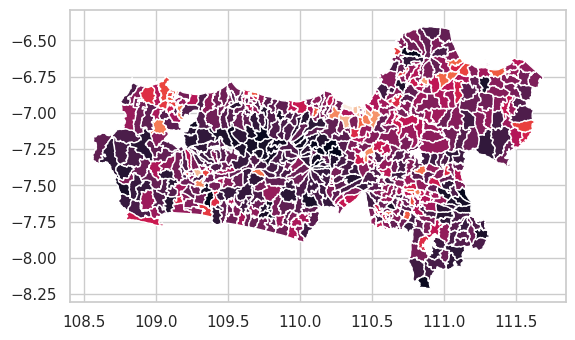

In [ ]:
join_data.plot(column='PEND_LGSG')

In [ ]:
# pip install mapclassify

#### Peta Tematik Konsumsi Listrik Per Kapita 2021 Level Kecamatan Provinsi Jawa Tengah 2021 dengan Pendugaan Langsung

<Axes: >

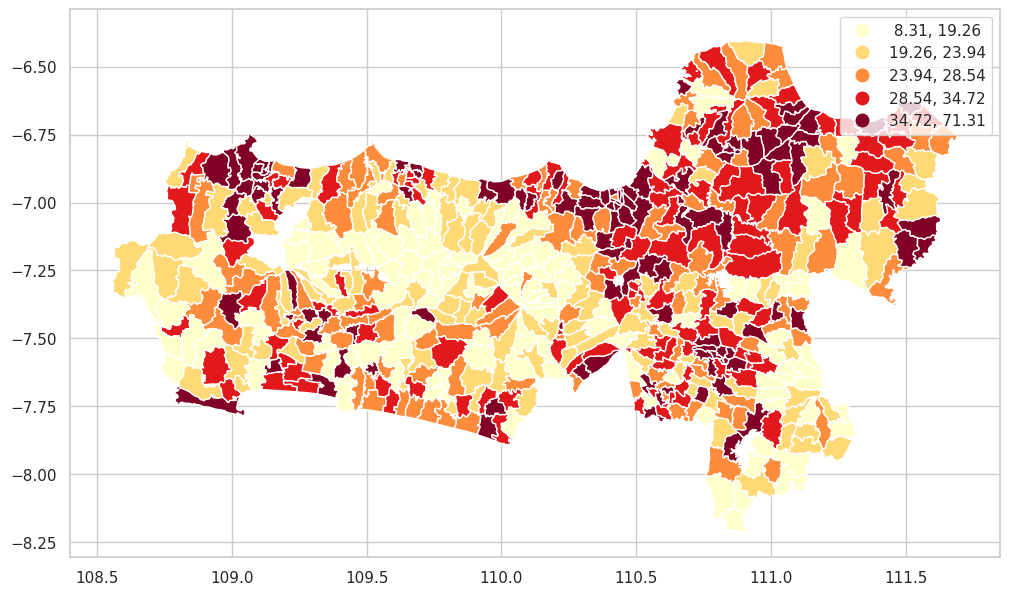

In [ ]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
join_data.plot(column='PEND_LGSG', scheme='Quantiles', k=5, cmap='YlOrRd', legend=True, ax=ax)
#ax.set_xlim(150000, 160000)
#ax.set_ylim(208000, 215000)

### Spatial Autocorrelation

In [ ]:
# Spatial Simillarity using Queen Contiguity
wq =  lps.weights.Queen.from_dataframe(join_data)
wq.transform = 'r'

In [ ]:
# Attribute Similarity untuk ariabel RATA_LISTRIK
y1 = join_data['PEND_LGSG']
y1_lag = lps.weights.lag_spatial(wq, y1)

In [ ]:
y1_lag

array([18.91028269, 19.93759335, 18.51758895, 18.74592372, 22.42485799,
       22.24971584, 17.18329429, 20.13644383, 22.47077233, 21.06261256,
       23.43508003, 22.99046372, 26.25661595, 23.45697484, 27.67656841,
       28.84532956, 27.83989225, 32.13388356, 33.00379859, 35.28641724,
       22.18388497, 22.88373872, 27.03134852, 27.05413032, 22.0479175 ,
       18.921019  , 21.22731243, 24.86913541, 28.65998732, 24.15672148,
       28.59411387, 17.45041601, 28.69827281, 26.25486023, 29.08053205,
       28.01649699, 24.40552759, 25.93288574, 22.91773046, 25.70111343,
       22.21639541, 30.22844987, 29.7154303 , 22.54371684, 30.25498894,
       29.29415893, 41.36227122, 27.37970419, 24.73544459, 36.90965924,
       36.84960634, 33.96652967, 29.38529375, 23.25157695, 24.17347686,
       25.85682801, 28.97749379, 38.2269124 , 35.56107592, 26.70783351,
       22.82647091, 21.75842423, 21.26510917, 18.82923473, 17.76934568,
       20.50878938, 24.28480076, 21.47251379, 17.36225385, 23.07

In [ ]:
import mapclassify as mc
y1lagq5 = mc.Quantiles(y1_lag, k=5)

#### Spatial Lag RATA-RATA KONSUMSI LISTRIK PER KAPITA

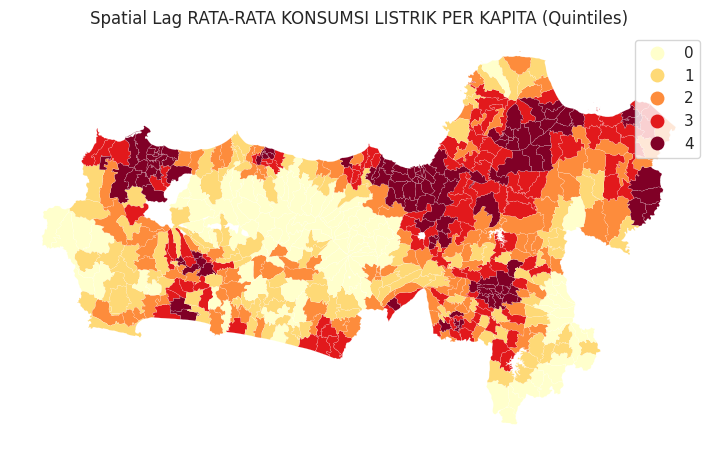

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
join_data.assign(cl=y1lagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='YlOrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag RATA-RATA KONSUMSI LISTRIK PER KAPITA (Quintiles)")

plt.show()

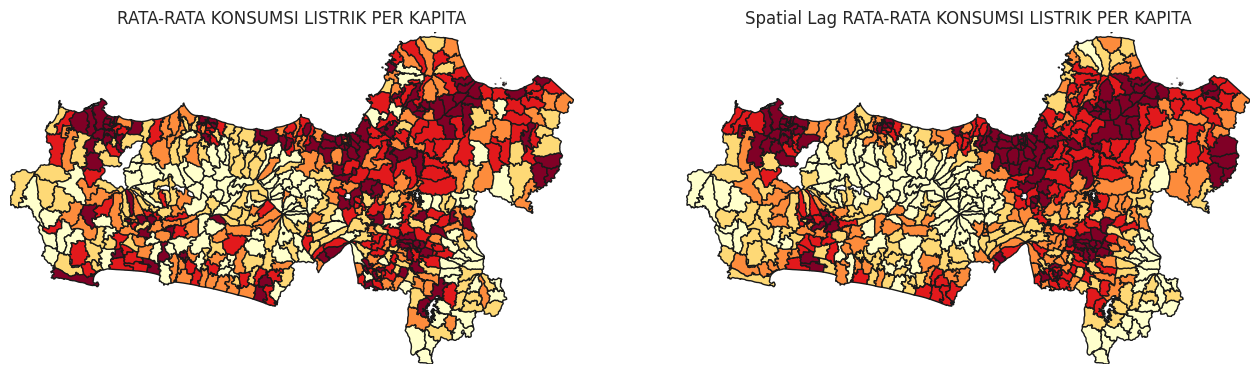

In [ ]:
# The quintile map for the spatial lag tends to enhance the impression of value similarity in space. It is, in effect, a local smoother.
join_data['lag_RATA_LISTRIK_KAPITA'] = y1_lag
f,ax = plt.subplots(1,2,figsize=(16,6))
join_data.plot(column='PEND_LGSG', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='YlOrRd')
ax[0].axis(join_data.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("RATA-RATA KONSUMSI LISTRIK PER KAPITA")
join_data.plot(column='lag_RATA_LISTRIK_KAPITA', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='YlOrRd', k=5)
ax[1].axis(join_data.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag RATA-RATA KONSUMSI LISTRIK PER KAPITA")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

#### Moran's Plot RATA-RATA KONSUMSI LISTRIK PER KAPITA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

join_data["RATA_LISTRIK_std"] = scaler.fit_transform(join_data["PEND_LGSG"].values.reshape(-1,1))
join_data["lag_RATA_LISTRIK_KAPITA_std"] = scaler.fit_transform(join_data["lag_RATA_LISTRIK_KAPITA"].values.reshape(-1,1))

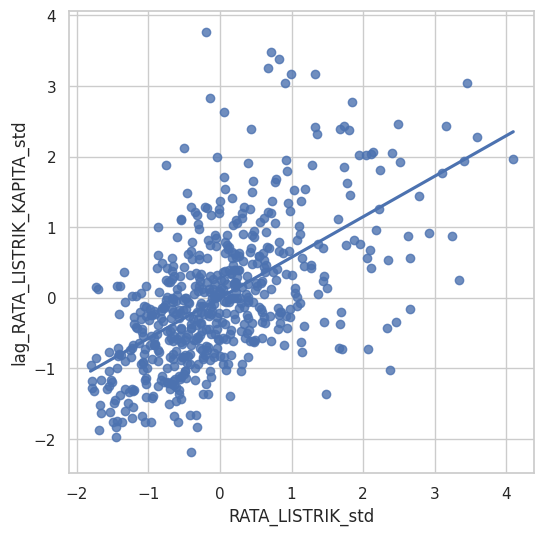

In [ ]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))

# Plot values
sns.regplot(
    x="RATA_LISTRIK_std", y="lag_RATA_LISTRIK_KAPITA_std", data=join_data, ci=None
);

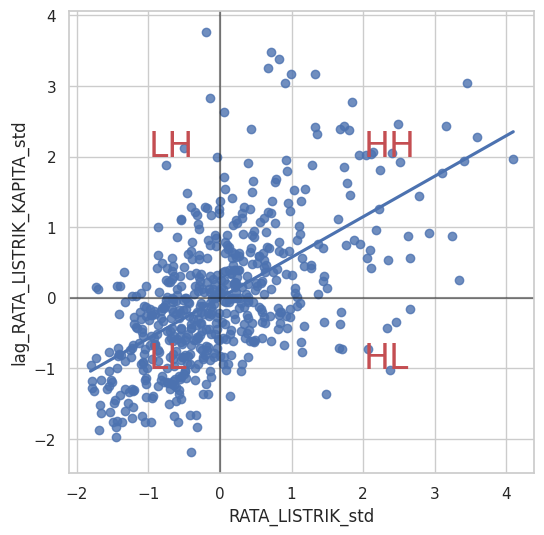

In [ ]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
sns.regplot(
    x="RATA_LISTRIK_std", y="lag_RATA_LISTRIK_KAPITA_std", data=join_data, ci=None
)
# Add vertical and horizontal lines
plt.axvline(0, c="k", alpha=0.5)
plt.axhline(0, c="k", alpha=0.5)
# Add text labels for each quadrant
plt.text(2, 2, "HH", fontsize=25, c="r")
plt.text(2, -1, "HL", fontsize=25, c="r")
plt.text(-1, 2.0, "LH", fontsize=25, c="r")
plt.text(-1, -1.0, "LL", fontsize=25, c="r")
# Display
plt.show()

### Local Indicator Spatial Association (LISA) untuk Konsumsi Listrik Per Kapita

In [ ]:
join_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
morans_i_y1 = esda.Moran(join_data['lag_RATA_LISTRIK_KAPITA'], wq)
morans_i_y1

In [ ]:
lisa_y1 = esda.Moran_Local(join_data['lag_RATA_LISTRIK_KAPITA'], wq)

In [ ]:
# Break observations into significant or not
join_data['signifikansi_y1'] = lisa_y1.p_sim < 0.05
#  Store the quadrant they belong to
join_data['kuadran_y1'] = lisa_y1.q

In [ ]:
## set index using column
join_data = join_data.set_index('idkec')

In [ ]:
join_data['signifikansi_y1'].head(25)

idkec
3301010     True
3301020     True
3301030     True
3301040    False
3301050     True
3301060     True
3301070     True
3301080     True
3301090    False
3301100     True
3301110    False
3301120    False
3301121    False
3301130    False
3301140    False
3301150    False
3301160    False
3301170    False
3301180    False
3301190    False
3301200    False
3301710    False
3301720    False
3301730    False
3302010     True
Name: signifikansi_y1, dtype: bool

In [ ]:
join_data['kuadran_y1'].head(25)

idkec
3301010    3
3301020    3
3301030    3
3301040    3
3301050    3
3301060    3
3301070    3
3301080    3
3301090    3
3301100    3
3301110    3
3301120    3
3301121    3
3301130    3
3301140    4
3301150    1
3301160    1
3301170    1
3301180    1
3301190    1
3301200    2
3301710    3
3301720    3
3301730    3
3302010    3
Name: kuadran_y1, dtype: int64

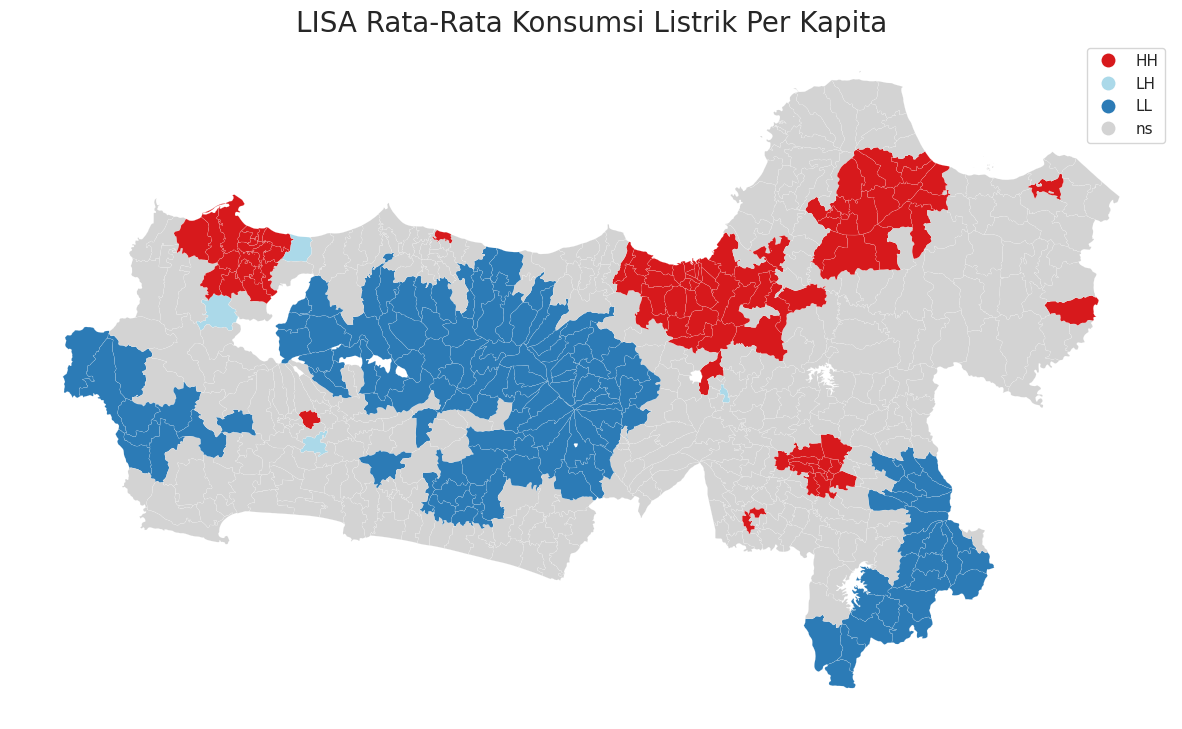

In [ ]:
f, ax = plt.subplots(1, figsize=(15,15))
lisa_cluster(lisa_y1, join_data, ax=ax)
ax.set_title("LISA Rata-Rata Konsumsi Listrik Per Kapita", size=20)
ax.set_axis_off()
# plt.title("LISA Rata-Rata Konsumsi Listrik Per Kapita")
plt.show()